<a href="https://colab.research.google.com/github/RafDingo/Maths40/blob/main/Phase1_Group40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determining likelihood of Exoplanet discovery under different Astronomical conditions

**Group Name:** Group 40

**Name(s) & ID(s) of Group Members:** Adrian Rebellato (S3889401), Rafat Mahiuddin (s3897093), Arthul George (S3918048)

## ***`Contents`***

* [Introduction](#Introduction)
    * [Dataset Source](#Dataset_Source)
    * [Dataset Details](#Dataset_Details)
    * [Dataset Variables](#Dataset_Variables)
    * [Response Variables](#Response_Variables)
    * [Goals and Objectives](#Goals_and_Objectives)
    * [Data Import](#import_dataset)

* [Data Cleaning and Preprocessing](#Data_Cleaning_and_Preprocessing)
    * [Create Data Branch](#create_data_branch)
    * [Removing Unnecessary Columns](#Removing_Unnecessary_Columns)
        * [Renaming Columns](#Rename_Columns)
    * [Calculate Additional Columns](#Calculate_Additional_Columns)
        * [Data Properties](#Data_Properties)
    * [Finding Outliers](#Finding_Outliers)
    * [Processing Rows](#Processing_Rows)
        * [Dropping NaN Values](#dropping_nan_values)
* [Data Exploration and Visualization](#Visualization)
* [Literature Review](#Literature_Review)
* [Summary & Conclusions](#Summary_and_Conclusions)
* [References](#References)


---



## ***`Introduction`*** <a name="Introduction"></a>



Humanity has discovered thousands of planets outside of our solar system, using a variety of methods. What most of these methods have in common, is the detection of an anomaly in a signal from a visible star. This could be an exoplanet passing in front of the star from our perspective, lowering its brightness, or a wobble imparted by the mass of a planet as both the planet and the star pull at each other.
We suspect that the methods used to discover planets, would impart a bias on the way which we discover these bodies, and we hope to explore this link. 


### **Dataset Source** <a name="Dataset_Source"></a>


This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program (1)

The data is sourced from multiple missions which had/have the goal of discovering exo-planets. Some missions include: TESS, Kepler, K2, KELT and UKIRT.


### **Dataset Details** <a name="Dataset_Details"></a>


The dataset is a subset of information provided by NASA about all discovered Exo-planets. An exoplanet, or extra-solar planet, is any planet sized body outside of our solar system. Such planets may either orbit around another star, or be star-less. (2)

NASA's archive provides many features, which we limited to 28.
After further filtering features which are not applicable to our study, we have 18 features, and 4521 entries.

### **Dataset Variables** <a name="Dataset_Variables"></a>
The features in our dataset are described in the table below.

In [1]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['sy_snum', 'Nominal categorical', 'NA', 'Number of stars in the system'],
         ['sy_pnum', 'Nominal categorical', 'NA', 'Number of planets in the system'],
         ['cb_flag', 'Nominal categorical', 'NA', 'Circumbinary flag: whether the planet orbits 2 stars'],
         ['pl_orbper', 'Numeric', 'Earth days', 'Orbital period (Time it takes planet to complete an orbit'],
         ['pl_orbsmax', 'Numeric', 'au', 'Orbit semi-Major Axis. au is the distance from Earth to sun.'],
         ['pl_rade', 'Numeric', 'Earth radius', 'Planet radius, where 1.0 is Earth\'s radius'],
         ['pl_bmasse', 'Numeric', 'Earth Mass', 'Planetary Mass, where 1.0 is Earth\'s mass'],
         ['pl_orbeccen', 'Numeric', 'NA', 'Planet\s orbital eccentricity'],
         ['pl_eqt', 'Numeric', 'Kelvin', 'Equilibrium Temperature: (The planetary equilibrium temperature is a the theoretical temperature that a planet would be a black body being heated only by its parent star)'],
         ['st_teff', 'Numeric', 'Kelvin', 'Stellar Effective Temperature'],
         ['st_rad', 'Numeric', 'Solar Radius', 'Stellar Radius, where 1.0 is 1 of our Sun\'s radius'],
         ['st_mass', 'Numeric', 'Solar Mass', 'Stellar Mass, where 1.0 is 1* our Sun\'s mass'],
         ['st_lum', 'Numeric', 'log(Solar luminosity)', 'Stellar Luminosity'],
         ['st_age', 'Numeric', 'gyr (Gigayear)', 'Stellar Age'],
         ['glat', 'Numeric', 'degrees', 'Galactic Latitude'],
         ['glon', 'Numeric', 'degrees', 'Galactic Longitude'],
         ['sy_dist', 'Numeric', 'parsec', 'Distance'],
         ['sy_plx', 'Numeric', 'mas (miliarcseconds)', 'Parallax: Distance the star moves in relation to other objects in the night sky'],
        ]

print(tabulate(table, headers='firstrow', tablefmt='simple'))

Name         Data Type            Units                  Description
-----------  -------------------  ---------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sy_snum      Nominal categorical  NA                     Number of stars in the system
sy_pnum      Nominal categorical  NA                     Number of planets in the system
cb_flag      Nominal categorical  NA                     Circumbinary flag: whether the planet orbits 2 stars
pl_orbper    Numeric              Earth days             Orbital period (Time it takes planet to complete an orbit
pl_orbsmax   Numeric              au                     Orbit semi-Major Axis. au is the distance from Earth to sun.
pl_rade      Numeric              Earth radius           Planet radius, where 1.0 is Earth's radius
pl_bmasse    Numeric              Earth Mass             Planetary Mass, where 1.0 i

### **Response Variables** <a name="Response_Variables"></a>


Our response variable is pl_rade (planet_radius). This is the size of the exoplanet discovered. Our study will focus on the discoverability of planets, and we suspect that the radius of the planet will significantly affect how easy it is to be discovered. Initially we attempted to use sy_pnum as our target variable, but being a nominal categorical variable, this would not have been suited for a linear regression model.

Choosing this as our response variable will allow us to investigate which features influence the size of a discovered exoplanet. As the methods used to discover exoplanets benefit from larger planets, this will provide us with insight into the effectiveness of these methods.


### **Goals and Objectives** <a name="Goals_and_Objectives"></a>


Our goal is to discover what features influence the likelihood of exoplanet discovery. We have to make a few assumptions to do this effectively using linear regression. The most fundamental assumption is that the distribution of exoplanets in our galaxy is not correlated with their distance from our solar system. This is an important assumption to make, as it allows us to infer that trends in the distribution of exoplanets, are due to undiscovered exoplanets.

We will also assume that planet radius is correlated with ease of discovery. We can safely assume this, as planet radius is strongly related to planet mass, and both of these are critical for all popular exoplanet discovery methods. We also will confirm that the majority of our data comes from the Keplar mission, which utilizes the transit method. (8) This method discovers exoplanets as they pass in front of distant stars. Larger planets cause a more significant drop in brightness. Which increases the distance that exoplanets can be discovered.

Our main objective is to predict the size of discovered exoplanets based on features of the solar system. By predicting the size, we are actually determining what features limit the discoverability of planets smaller than the predicted size.
Our secondary objective is to perform exploratory data analysis using basic visualization, to further understand the features of our dataset. This Phase 1 report details this exploration.



### **Import Dataset** <a name="import_dataset"></a>


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
sns.set(rc={"figure.dpi":150, 'savefig.dpi':300})

# For mac users
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
url = 'https://raw.githubusercontent.com/RafDingo/Maths40/main/data/exoPlanets.csv'
df_main = pd.read_csv(url, error_bad_lines=False, index_col=False)

In [4]:
print('Shape:', df_main.shape)
df_main.sample(10, random_state=999)

Shape: (4521, 28)


loc_rowid  sy_snum  sy_pnum  sy_mnum  cb_flag  pl_orbper  pl_orbsmax  \
3009       3010        1        3        0        0   6.988055      0.0690   
1852       1853        1        1        0        0  10.458434      0.0845   
2512       2513        1        1        0        0  33.496900      0.2008   
1469       1470        1        4        0        0   5.577212      0.0400   
3589       3590        1        1        0        0   2.237493      0.0325   
3347       3348        1        1        0        0  18.684049      0.1396   
4251       4252        1        7        0        0   2.421937      0.0158   
2436       2437        1        1        0        0   9.878482      0.0932   
2654       2655        1        3        0        0   3.619337      0.0460   
2570       2571        1        2        0        0   2.061897      0.0320   

      pl_rade  pl_bmasse    pl_dens  pl_orbeccen  pl_insol  pl_eqt  ttv_flag  \
3009    1.150      7.300  26.400000      0.00000    101.84   914.0         0   
1852    1.330      2.330   5.440000      0.00000     24.21   609.0         0   
2512    1.260      2.120   5.830000      0.00000     37.30   630.0         0   
1469    1.080      1.280   5.580000      0.11000      8.50     NaN         0   
3589    1.330      2.330   5.440000      0.00000    336.67  1160.0         0   
3347    2.630      7.410   2.240000      0.00000    176.23   832.0         0   
4251    1.097      1.308   5.463993      0.00654      2.21   342.0         1   
2436    2.580      7.180   2.300000      0.00000    187.85  1003.0         0   
2654    1.480      2.790   4.730000      0.00000    460.66  1156.0         0   
2570    1.680      3.460   4.010000      0.00000   1069.23  1463.0         0   

     st_spectype  st_teff  st_rad  st_mass st_metratio  st_lum  st_logg  \
3009         NaN  5631.00    0.80     0.93       [M/H]  -0.313     4.59   
1852         NaN  4730.00    0.72     0.76      [Fe/H]  -0.727     4.62   
2512         NaN  4681.53    0.77     0.75       [M/H]  -0.588     4.54   
1469         NaN  3360.47    0.33     0.27         NaN  -1.837     4.90   
3589         NaN  5099.00    0.76     0.80      [Fe/H]  -0.501     4.58   
3347         NaN  5573.00    1.15     0.95      [Fe/H]   0.525     4.29   
4251         NaN  2566.00    0.12     0.09      [Fe/H]  -3.257     5.24   
2436         NaN  6150.00    1.18     1.12      [Fe/H]   0.145     4.34   
2654         NaN  5502.00    1.06     1.02      [Fe/H]   0.009     4.39   
2570         NaN  6021.00    1.14     0.98      [Fe/H]   0.034     4.35   

      st_age  st_rotp      glat      glon    sy_pmdec      sy_dist     sy_plx  
3009    4.37      NaN  13.51572  80.80071   -7.505880   616.637000   1.593200  
1852    3.98      NaN  18.96771  79.57519   -7.082450   342.509000   2.890830  
2512     NaN      NaN  15.04776  74.44132  -19.463100   247.771000   4.007050  
1469     NaN      NaN -49.94032  51.46106   74.339100    66.432100  15.024200  
3589    4.90      NaN  12.92363  73.89376    0.090604   591.776000   1.661150  
3347   10.47      NaN  11.33166  80.68890    1.326260   992.852000   0.978491  
4251    0.50      1.4 -56.64891  69.71519 -492.000000    12.429889  80.451243  
2436    3.16      NaN  19.93538  78.45346    7.767660  1031.310000   0.940878  
2654    6.30      NaN  11.28870  79.45283   20.872000   656.380000   1.494720  
2570    5.80      NaN  19.64002  73.51949  -14.774300   968.544000   1.003920

---

## ***`Data Cleaning and Preprocessing`*** <a name="Data_Cleaning_and_Preprocessing"></a>

### **Create Data Branch** <a name="create_data_branch"></a>
Copy data from main into a working dataframe. This is done to prevent reimporting the entire data from source repeatedly.

In [5]:
# Copy orignal data to a a working dataframe
df = df_main.copy()

### **Removing Unnecessary Columns** <a name="Removing_Unnecessary_Columns"></a>

The following columns has been identified to be either useless towards our analysis of the target feature or is not suitable for machine learning.

Variables to drop:
  - loc_rowid (ID column)
  - pl_dens (Data already covered by mass and size)
  - pl_insol (Similar feature to size)
  - ttv_flag (Data not suitable for our analysis)
  - st_spectype (Categorical version of solar luminosity)
  - st_metratio (Bad values)
  - st_logg (Similar feature to solar mass and size)
  - st_rotp (Data unrelated to our target feature)
  - sy_pmdec (Data unrelated to our target feature)

In [6]:
# View all columns to find ones required for regression
df.columns

Index(['loc_rowid', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'pl_orbper',
       'pl_orbsmax', 'pl_rade', 'pl_bmasse', 'pl_dens', 'pl_orbeccen',
       'pl_insol', 'pl_eqt', 'ttv_flag', 'st_spectype', 'st_teff', 'st_rad',
       'st_mass', 'st_metratio', 'st_lum', 'st_logg', 'st_age', 'st_rotp',
       'glat', 'glon', 'sy_pmdec', 'sy_dist', 'sy_plx'],
      dtype='object')

In [7]:
# Drop id and irrelevant columns
del df['loc_rowid']
del df['pl_dens']
del df['pl_insol']
del df['ttv_flag']
del df['st_spectype']
del df['st_metratio']
del df['st_logg']
del df['st_rotp']
del df['sy_pmdec']
del df['sy_mnum']
# data check
df.columns

Index(['sy_snum', 'sy_pnum', 'cb_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade',
       'pl_bmasse', 'pl_orbeccen', 'pl_eqt', 'st_teff', 'st_rad', 'st_mass',
       'st_lum', 'st_age', 'glat', 'glon', 'sy_dist', 'sy_plx'],
      dtype='object')

### **Renaming Columns** <a name="Rename_Columns"></a>

In [8]:
# Change to readable column names.
df.rename({
      'sy_snum': 'num_star',
      'sy_pnum': 'num_planet',
      'cb_flag': '2_stars',
      'pl_orbper': 'orbital_period',
      'pl_orbsmax': 'semi-major_axis',
      'pl_rade': 'planet_radius',
      'pl_bmasse': 'planet_mass',
      'pl_orbeccen': 'planet_eccen',
      'pl_eqt': 'planet_temp',
      'st_teff': 'star_temp',
      'st_rad': 'star_radius',
      'st_mass': 'star_mass',
      'st_lum': 'star_bright',
      'st_age': 'star_age',
      'glat': 'latitude_gal',
      'glon': 'longitude_gal',
      'sy_dist': 'distance',
      'sy_plx': 'parallax'
      }, 
      axis=1, inplace=True
)
# data check
df.head()

num_star  num_planet  2_stars  orbital_period  semi-major_axis  \
0         2           1        0       326.03000             1.29   
1         1           1        0       516.21997             1.53   
2         1           1        0       185.84000             0.83   
3         1           2        0      1773.40002             2.93   
4         3           1        0       798.50000             1.66   

   planet_radius  planet_mass  planet_eccen  planet_temp  star_temp  \
0           12.1    6165.6000         0.231          NaN     4742.0   
1           12.3    4684.8142         0.080          NaN     4213.0   
2           12.9    1525.5000         0.000          NaN     4813.0   
3           12.9    1481.0878         0.370          NaN     5338.0   
4           13.5     565.7374         0.680          NaN     5750.0   

   star_radius  star_mass  star_bright  star_age  latitude_gal  longitude_gal  \
0        19.00       2.70        2.243       NaN      78.28058      264.13775   
1        29.79       2.78        2.430      1.56      41.04437      108.71900   
2        11.00       2.20        1.763      4.50     -21.05141      106.41269   
3         0.93       0.90       -0.153      3.90      46.94447       69.16849   
4         1.13       1.08        0.097      7.40      13.20446       83.33558   

   distance  parallax  
0   93.1846  10.71040  
1  125.3210   7.95388  
2   75.4392  13.22890  
3   17.9323  55.73630  
4   21.1397  47.27540

### **Calculate Additional Columns** <a name="Calculate_Additional_Columns"></a>

For greater data visualisation of star systems, additional columns must be calculated. These columns include the following:
    
- Planet : Sun mass ratio (within a scale of 0 - 1) [kg]
- Planet : Sun radius ratio (within a scale of 0 - 1) [km]

The above shall be calcullated in the following cells.


In [9]:
EARTH_MASS = 5.972 * (10**24)
SUN_MASS = 1.989 * (10**30)
EARTH_RADIUS = 6371 
SUN_RADIUS = 696340 
# mass ratio in kgs
df['mass_ratio_sys'] = (df['planet_mass'] * EARTH_MASS) / (df['star_mass'] * SUN_MASS)
# radius in km

df['radius_ratio_sys'] = (df['planet_radius'] * EARTH_RADIUS) / (df['star_radius'] * SUN_RADIUS)
# data check
df[['mass_ratio_sys', 'radius_ratio_sys']].sample(15)

mass_ratio_sys  radius_ratio_sys
1256        0.002227          0.040128
4304        0.000836          0.131004
938         0.002616          0.117505
3604        0.000169          0.083636
2682        0.000079          0.017727
615         0.001875          0.069139
626         0.004159          0.149819
141         0.000018          0.021659
35          0.001317          0.025175
3883        0.000008          0.014922
1138        0.000014          0.032054
1869        0.000028          0.027092
4254        0.000035          0.079675
1356        0.000074          0.022076
1961        0.000022          0.025035

#### Data Properties <a name="Data_Properties"></a>

The folllowing code analyses some important properties of the modified data before any other processing may be completed.

In [10]:
# Overview into data types and uniqueness
print('Unique rows =', df.shape[0], '| Unique columns =', df.shape[1])
print('-----')
print('Data types: ', df.dtypes)
print('-----')
print('Unique values per column: ', df.nunique())

Unique rows = 4521 | Unique columns = 20
-----
Data types:  num_star              int64
num_planet            int64
2_stars               int64
orbital_period      float64
semi-major_axis     float64
planet_radius       float64
planet_mass         float64
planet_eccen        float64
planet_temp         float64
star_temp           float64
star_radius         float64
star_mass           float64
star_bright         float64
star_age            float64
latitude_gal        float64
longitude_gal       float64
distance            float64
parallax            float64
mass_ratio_sys      float64
radius_ratio_sys    float64
dtype: object
-----
Unique values per column:  num_star               4
num_planet             8
2_stars                2
orbital_period      4364
semi-major_axis     2485
planet_radius       1235
planet_mass         1955
planet_eccen         437
planet_temp         1412
star_temp           1895
star_radius          397
star_mass            227
star_bright         1739
star_age

### **Outliers** <a name="Finding_Outliers"></a>

Using the standard 1.5* outlier check, systems with either planets > 4, or star > 2 will be considered to be outliers.

We know that these are reasonable data points therefore removing them will not be helpful for our study. Because of this we tested a 3.0 * outlier check which is common for astronomical data. (3)

Further investigation into our dataset revealed the dominance of the data from the Kepler mission. Unfortunately, even the 3 * IQR check removes most results that were not supplied by the Kepler mission. Using this check would significantly distort some relationships in our dataset.

The code below is our outlier check for 3.0 * IQR. We have chosen not to implement the check due to reasons mentioned previously and for the sake of visualisation. This might change for Phase 2.



In [11]:
# def set_outlier_nan(df):
#     """
#     - Finds outliers and sets their values to NaN to be processed later.
#     - Excluded columns involves categories to be excluded from the outlier check
#     """
#     excluded_columns = [
#                         'num_star',
#                         'num_planet',
#                         '2_stars',
#                         'longitude_gal',
#                         'latitude_gal',
#                         'parallax',
#                         'distance',
#     ]
#     for column_name in df.columns: 
#         # conditional to exclude certain columns from the outlier check
#         if column_name in excluded_columns:
#             continue
#         else:
#             column = df[column_name]
#             q1 = column.quantile(0.25)
#             q3 = column.quantile(0.75)
#             iqr = column.quantile(0.75) - column.quantile(0.25)

#             lower = q1 - 3 * iqr
#             upper = q3 + 3 * iqr
#             num_column_outliers = df[(column > upper) | (column < lower)]\
#             .shape[0]
#             # set rows that exceeds outlier parameters to none
#             df[(column > upper) | (column < lower)] = np.nan

#     return df

# df = set_outlier_nan(df=df)
# df.isna().sum()
# df.sample(25)

### **Processing Rows** <a name="Processing_Rows"></a>

#### Dropping NaN values <a name="dropping_nan_values"></a>

In [12]:
def drop_nan(df):
    df = df.dropna()

    nan_values = False
    for column in df.isna().sum():
        if not column == 0:
            nan_values = True
            break
    return df, nan_values

# Overview of null values
print('Before: \n', df.isna().sum())

df, nan_values = drop_nan(df=df)

print(f'''
After:
NaN Values?, {nan_values}

Shape: {df.shape}''')

Before: 
 num_star               0
num_planet             0
2_stars                0
orbital_period       151
semi-major_axis      184
planet_radius         14
planet_mass           22
planet_eccen         540
planet_temp         1146
star_temp            122
star_radius          141
star_mass              4
star_bright          136
star_age             814
latitude_gal           0
longitude_gal          0
distance               6
parallax             192
mass_ratio_sys        24
radius_ratio_sys     152
dtype: int64

After:
NaN Values?, False

Shape: (2895, 20)


### Append Target Feature
Append target feature to the end of the table.

In [13]:
temp = df['num_planet']
del df['num_planet']
df['num_planet'] = temp
df.head(5)

num_star  2_stars  orbital_period  semi-major_axis  planet_radius  \
24         3        0    11688.000000         12.00000         13.400   
26         2        0       14.651600          0.11340         13.900   
29         2        0        0.736547          0.01544          1.875   
43         1        0        8.463000          0.06450          4.070   
44         1        0       18.859019          0.11010          3.240   

    planet_mass  planet_eccen  planet_temp  star_temp  star_radius  star_mass  \
24     635.6600          0.45        700.0     7295.0         1.49       1.65   
26     263.9785          0.00        700.0     5172.0         0.94       0.91   
29       7.9900          0.05       1958.0     5172.0         0.94       0.91   
43      17.0000          0.00        593.0     3700.0         0.75       0.50   
44      13.6000          0.00        454.0     3700.0         0.75       0.50   

    star_bright  star_age  latitude_gal  longitude_gal  distance  parallax  \
24        0.752     0.020     -30.65764      198.61297   29.7575   33.5770   
26       -0.197     5.500      37.69663      196.79526   12.5855   79.4274   
29       -0.197    10.200      37.69663      196.79526   12.5855   79.4274   
43       -1.046     0.022     -36.80401       12.65304    9.7221  102.8290   
44       -1.065     0.022     -36.80401       12.65304    9.7221  102.8290   

    mass_ratio_sys  radius_ratio_sys  num_planet  
24        0.001157          0.082282           1  
26        0.000871          0.135292           5  
29        0.000026          0.018250           5  
43        0.000102          0.049650           2  
44        0.000082          0.039525           2

---

## ***`Data Exploration and Visualisation`***<a name="Visualization"></a>

### **Univariate Visualisation**

#### Popularity of Star Count for Discovered Planets 

([<matplotlib.axis.XTick at 0x7f47fe7ecdd0>,
 <a list of 4 Text major ticklabel objects>)

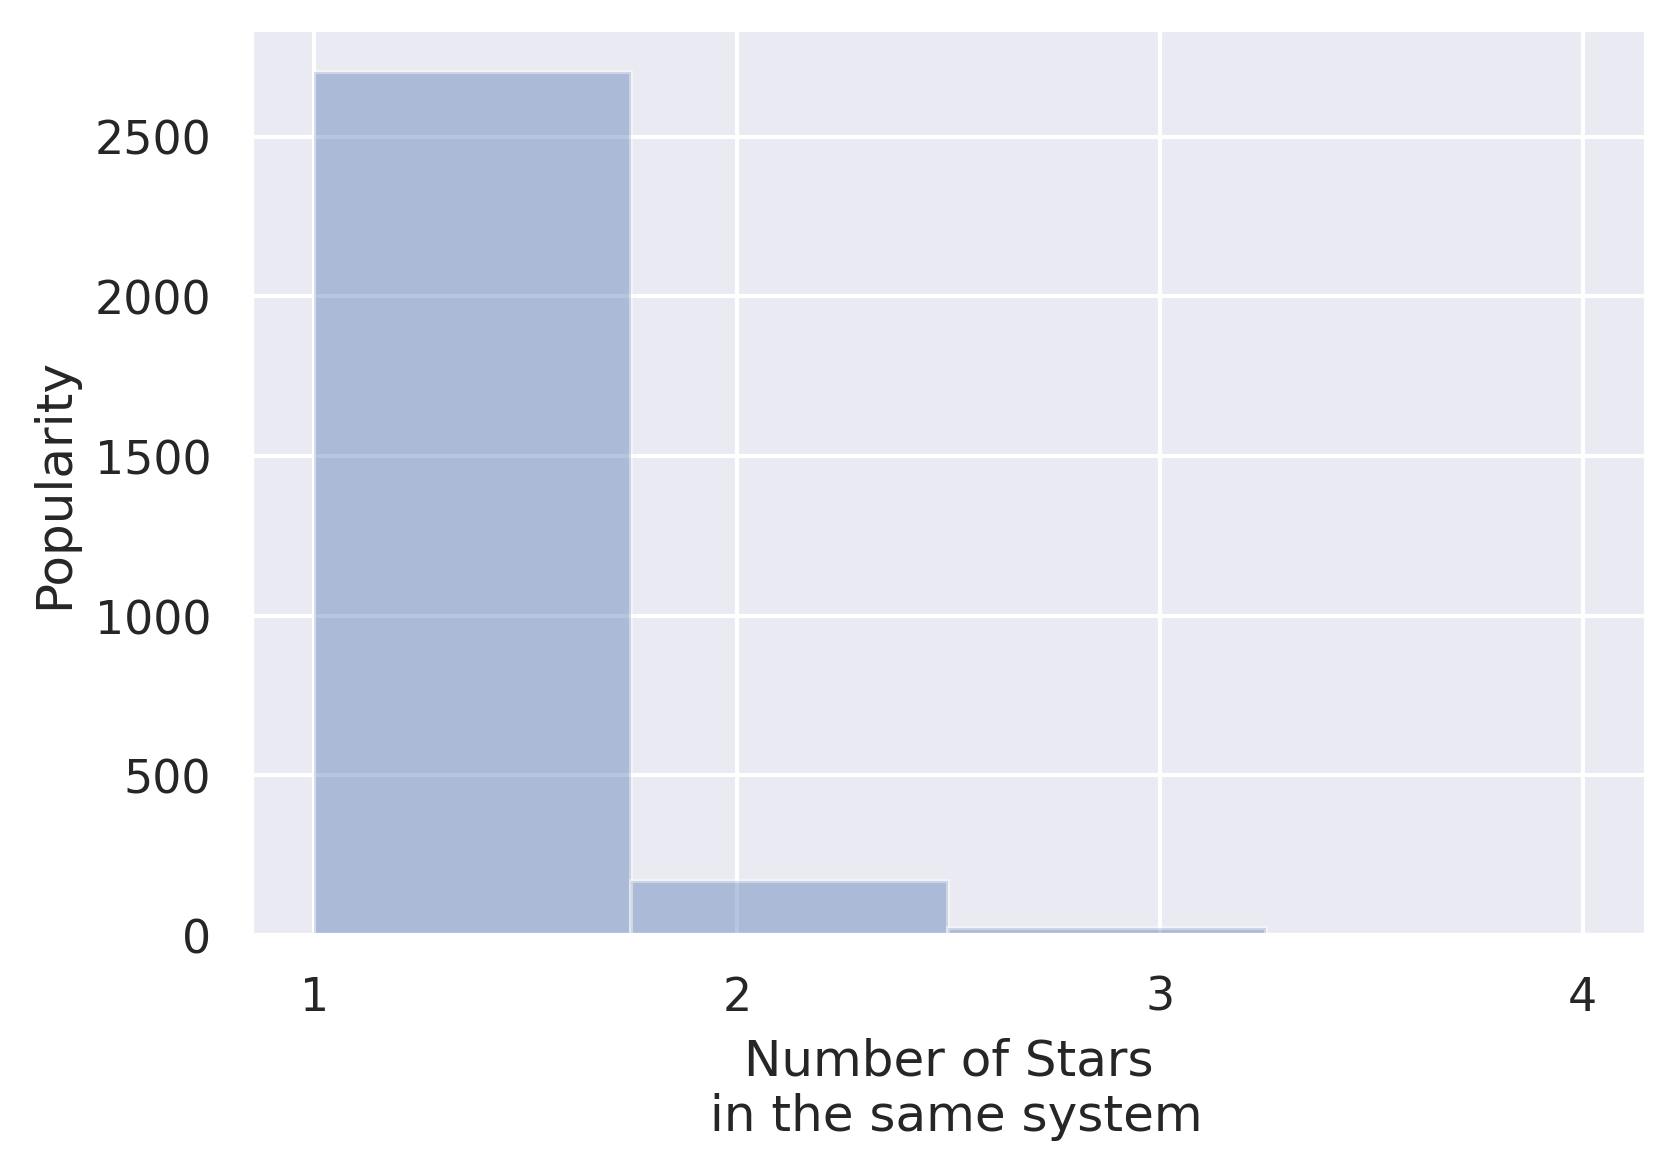

In [14]:
# number of stars 
sns.distplot(a=df['num_star'], bins=4, kde=False)
plt.xlabel('Number of Stars\n in the same system')
plt.ylabel('Popularity')
plt.xticks([1, 2, 3, 4])

This graph describes that the majority of star systems contains a single star. While it is rare, our dataset does contain systems with 2 stars, 3 stars and a single system with 4 stars.

#### Popularity of already discovered planets in the same system

Text(0, 0.5, 'Popularity')

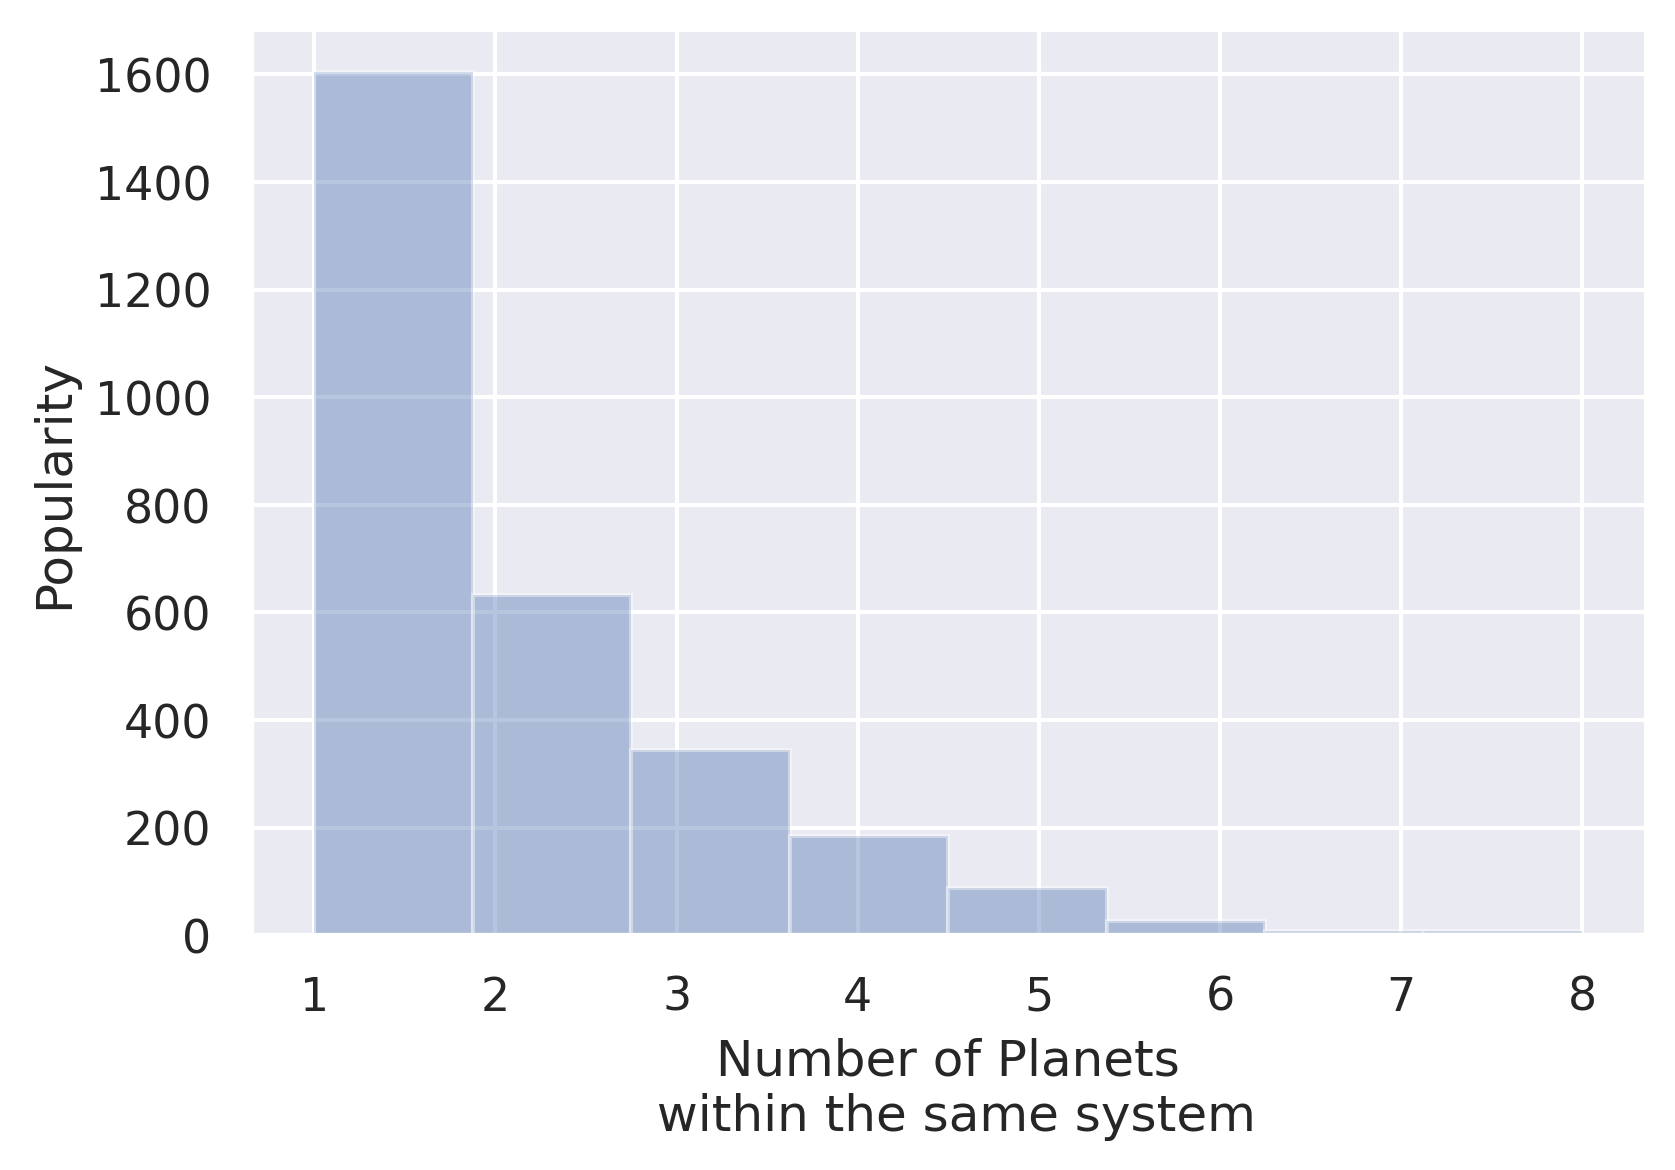

In [15]:
sns.distplot(x=df['num_planet'], bins=8, kde=False)
plt.xlabel('Number of Planets\n within the same system')
plt.ylabel('Popularity')

This chart depicts the number of systems and their respective planet count. Our data is comprised predominately of single planet systems, with a maximum planet count of 8. There is only a single system of 7 planets, and a single with 8.

In [16]:
# Randomisation of colours
from random import choice
colors = [
            'b', 'g', 'r', 
            'c', 'm', 'y',
            'b',
]


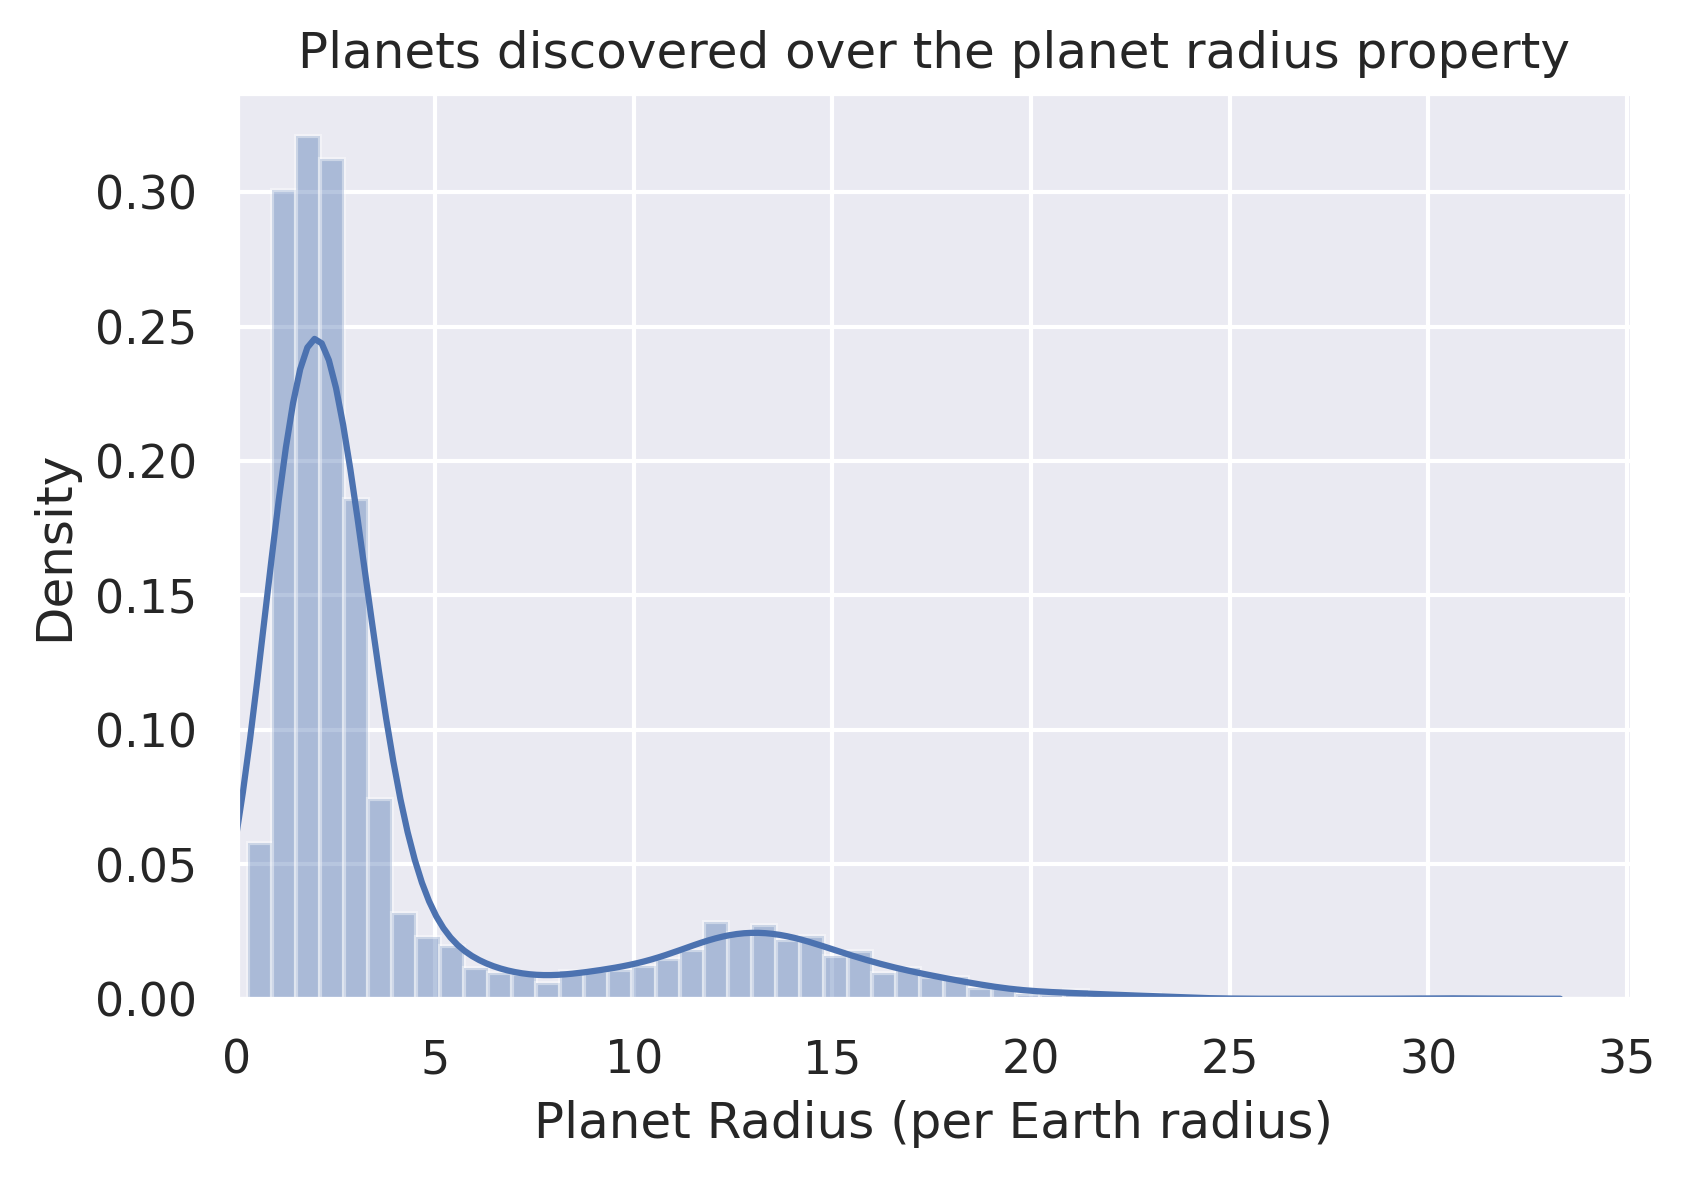

In [17]:
sns.distplot(x=df['planet_radius'], color=choice(colors))
plt.title(f'Planets discovered over the planet radius property')
plt.xlabel('Planet Radius (per Earth radius)')
plt.xlim(0, None)
plt.show()

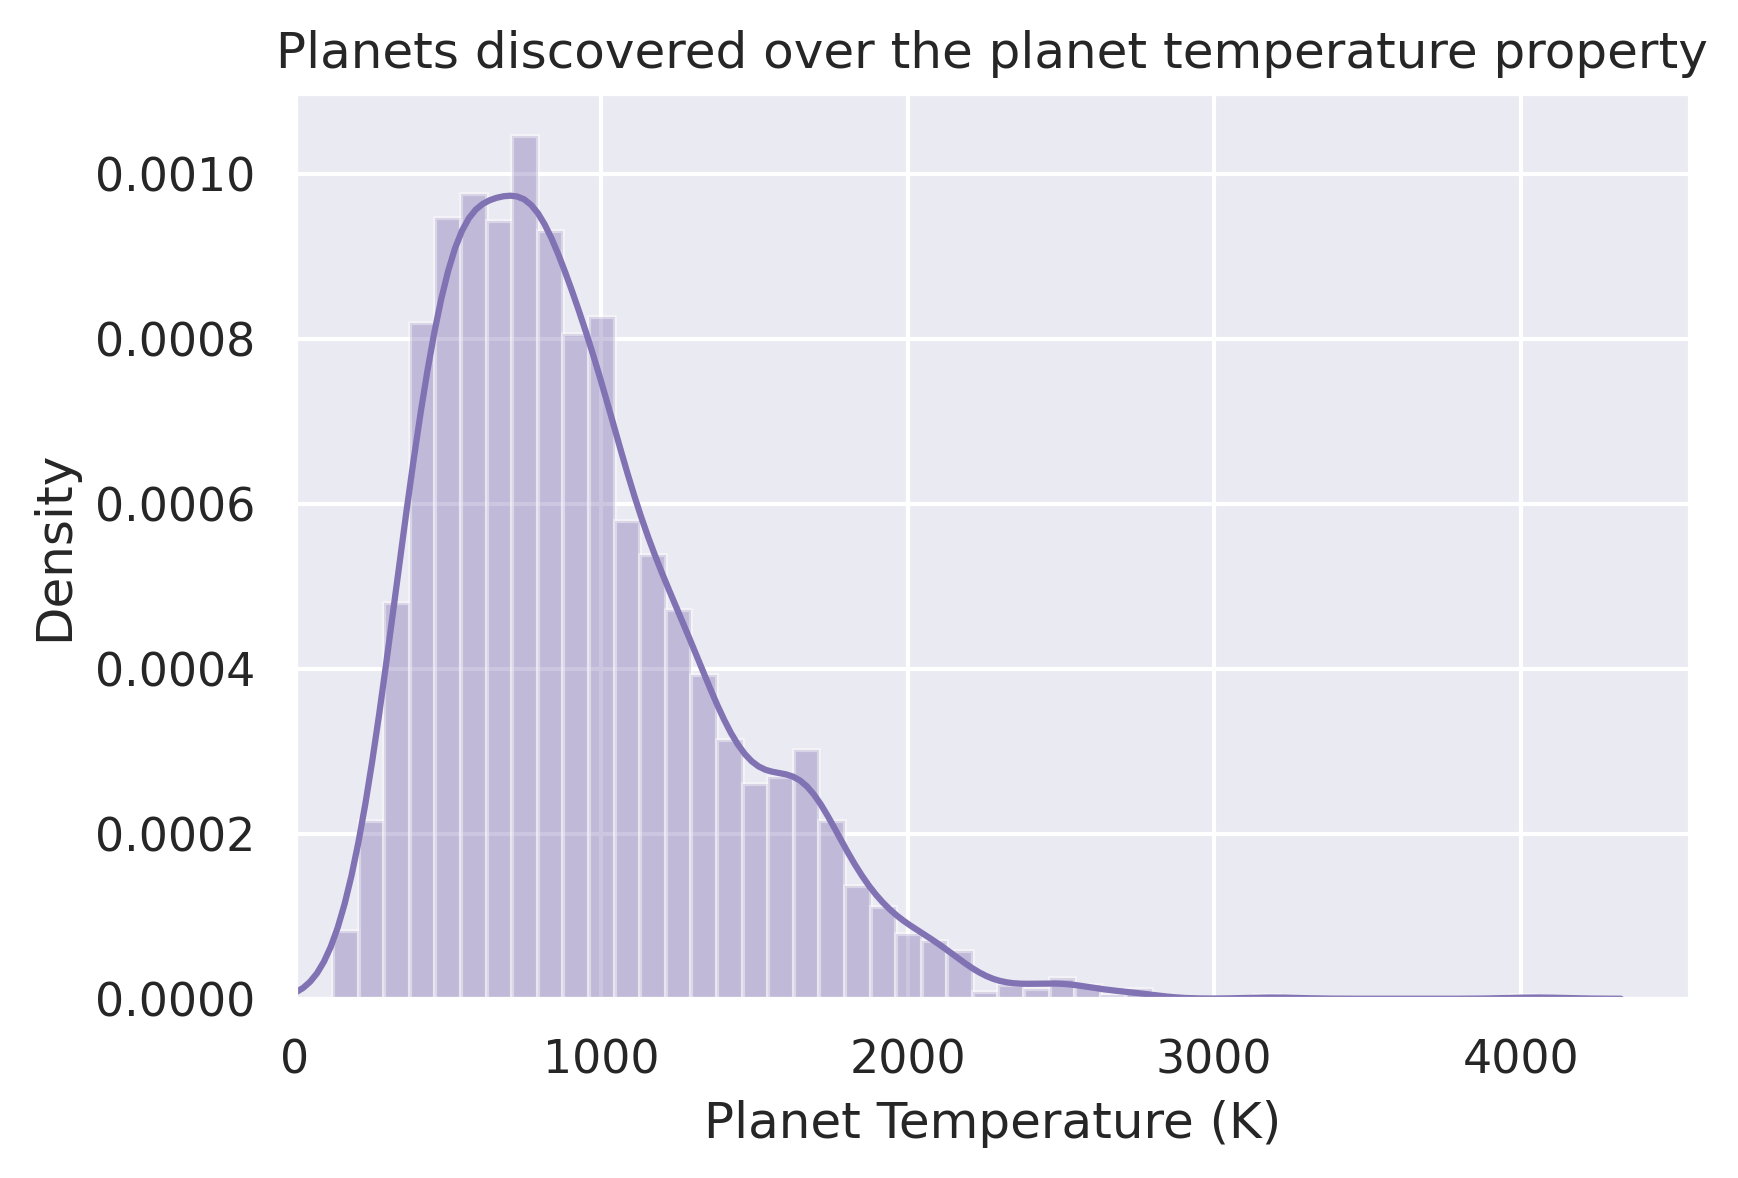

In [18]:
sns.distplot(x=df['planet_temp'], color=choice(colors))
plt.title(f'Planets discovered over the planet temperature property')
plt.xlabel('Planet Temperature (K)')
plt.xlim(0, None)

plt.show()

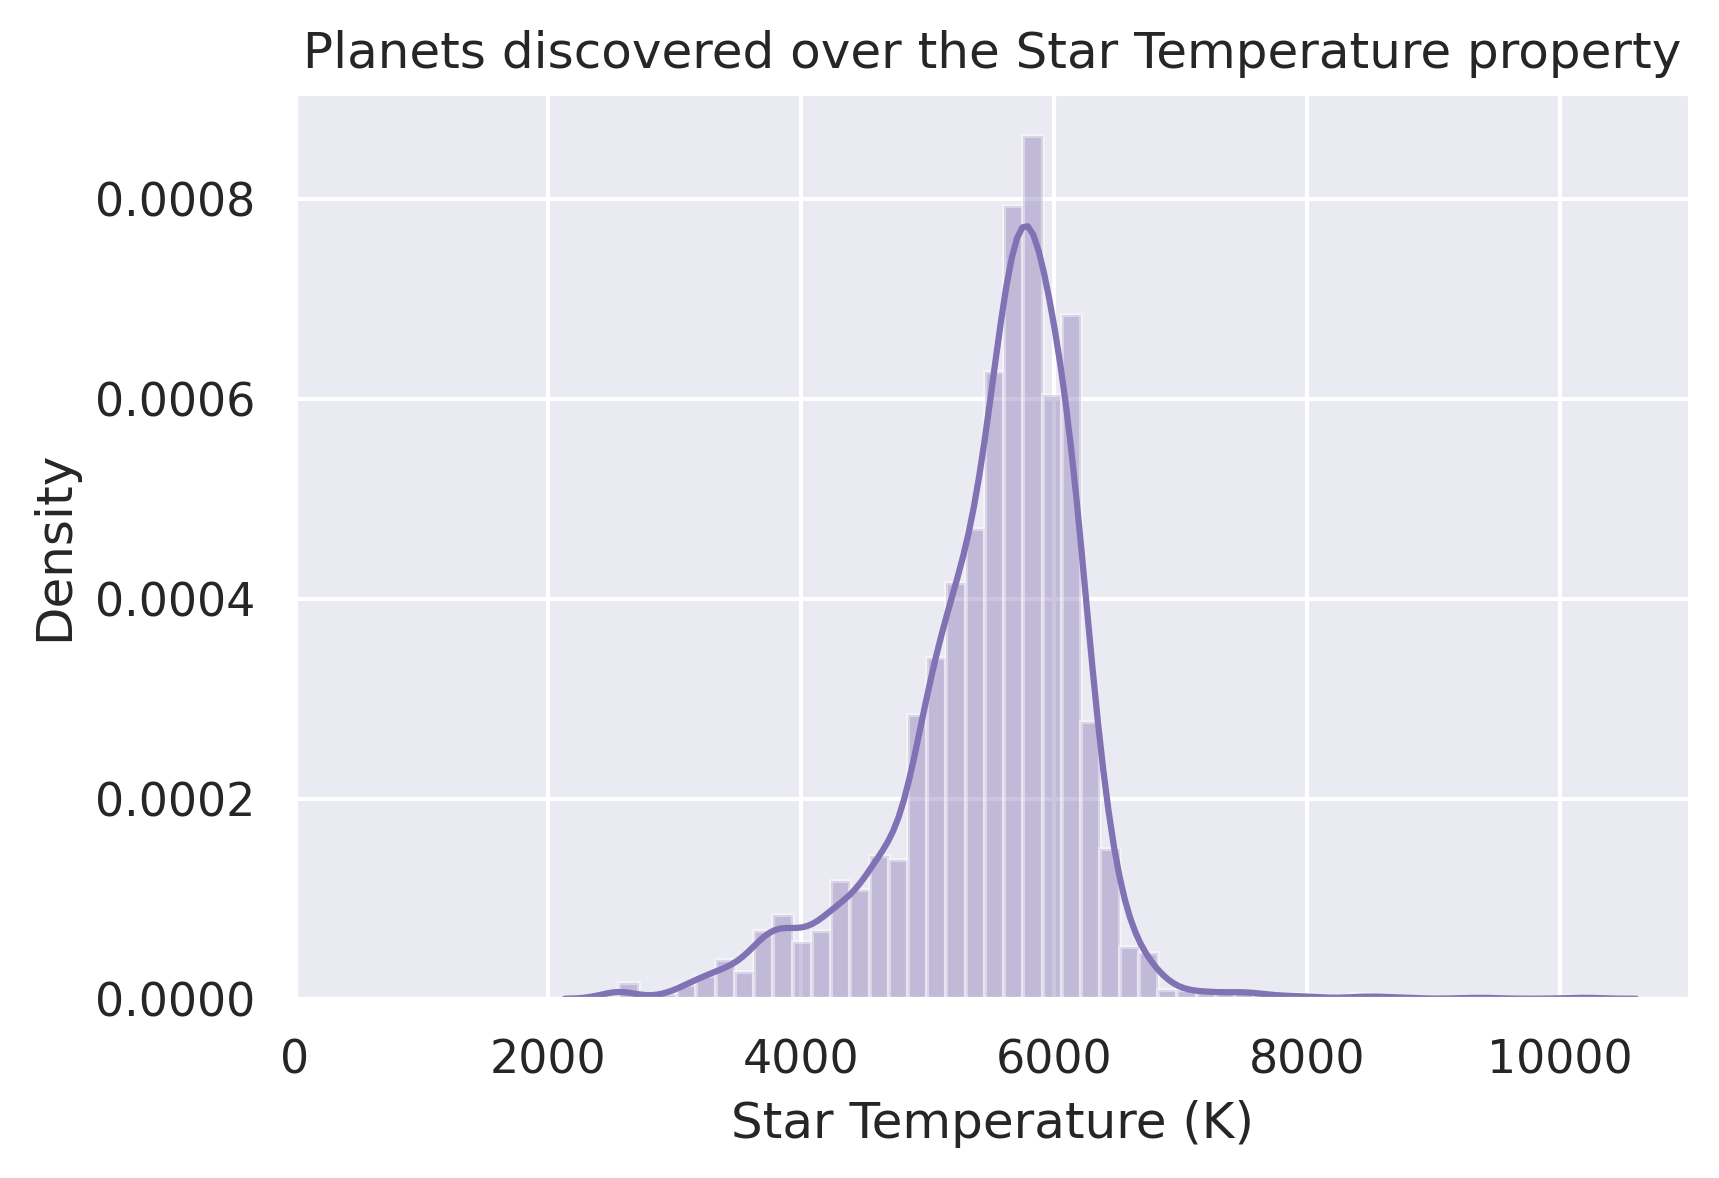

In [19]:
sns.distplot(x=df['star_temp'], color=choice(colors))
plt.title(f'Planets discovered over the Star Temperature property')
plt.xlabel('Star Temperature (K)')
plt.xlim(0, None)
plt.show()

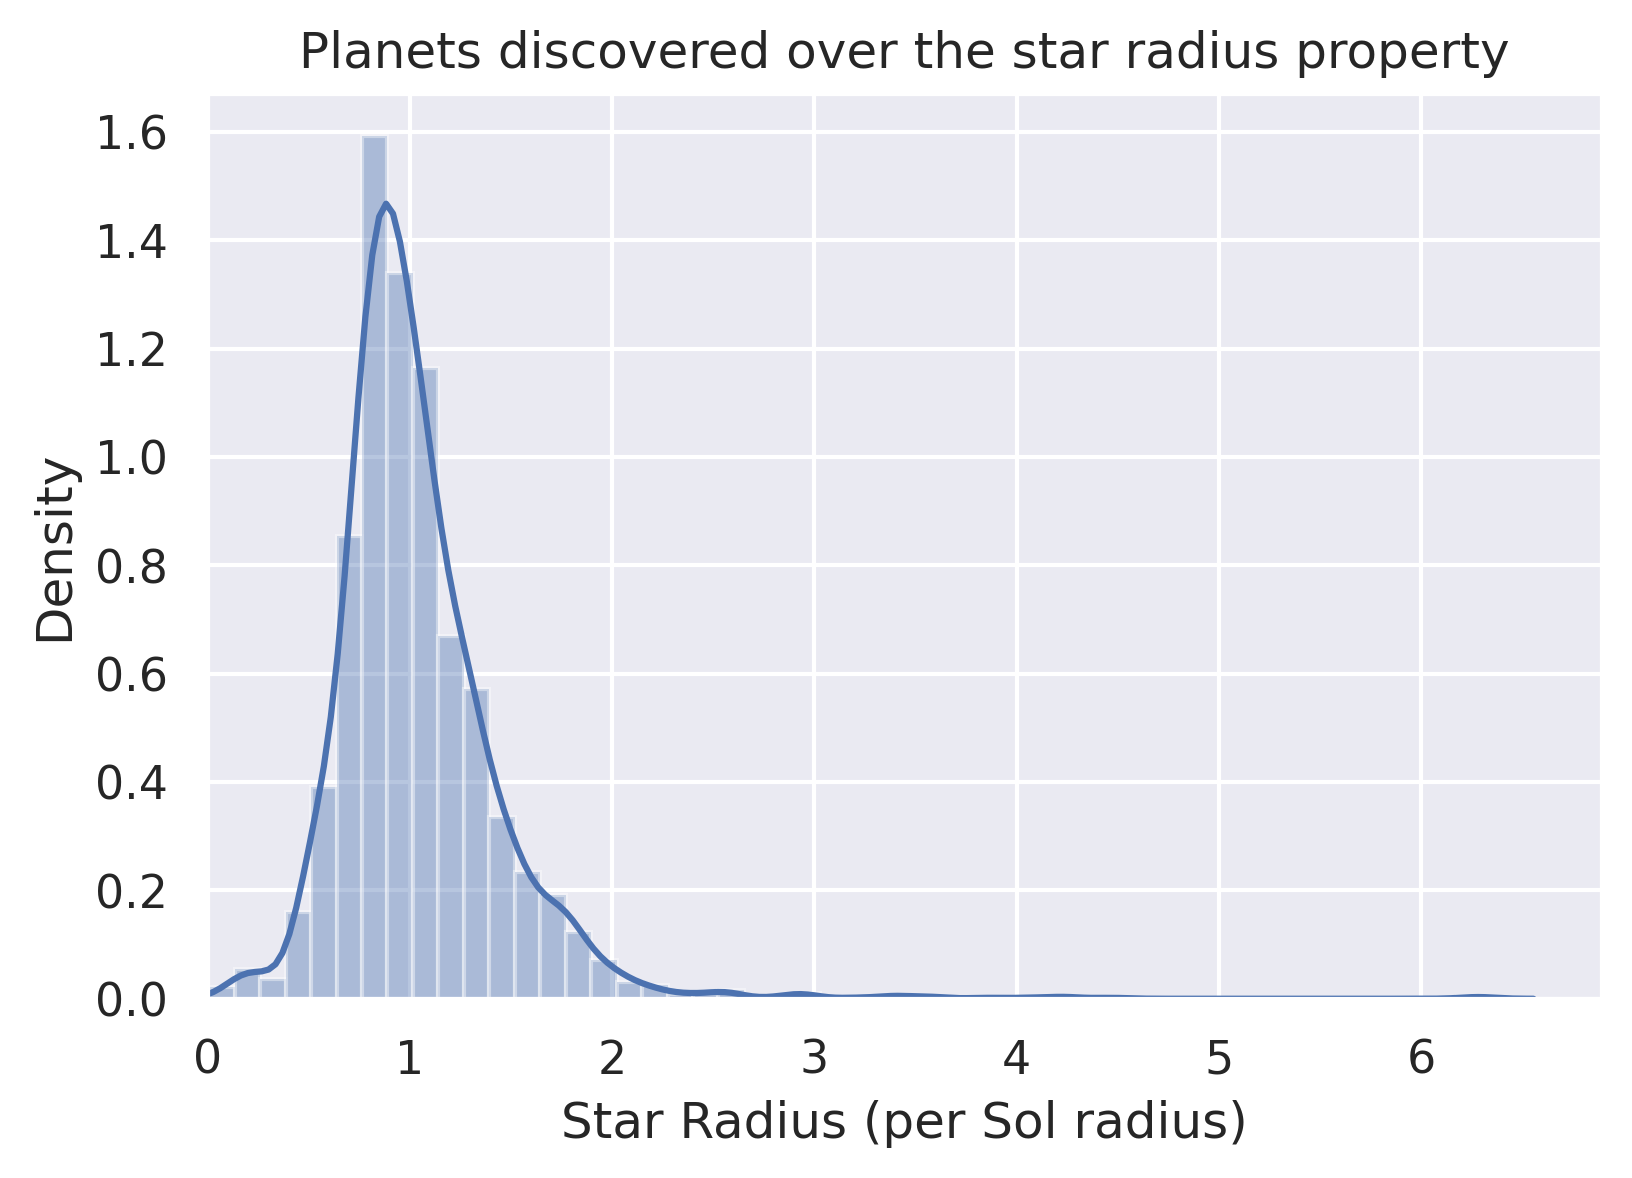

In [20]:
sns.distplot(x=df['star_radius'], color=choice(colors))
plt.title(f'Planets discovered over the star radius property')
plt.xlabel('Star Radius (per Sol radius)')
plt.xlim(0, None)
plt.show()

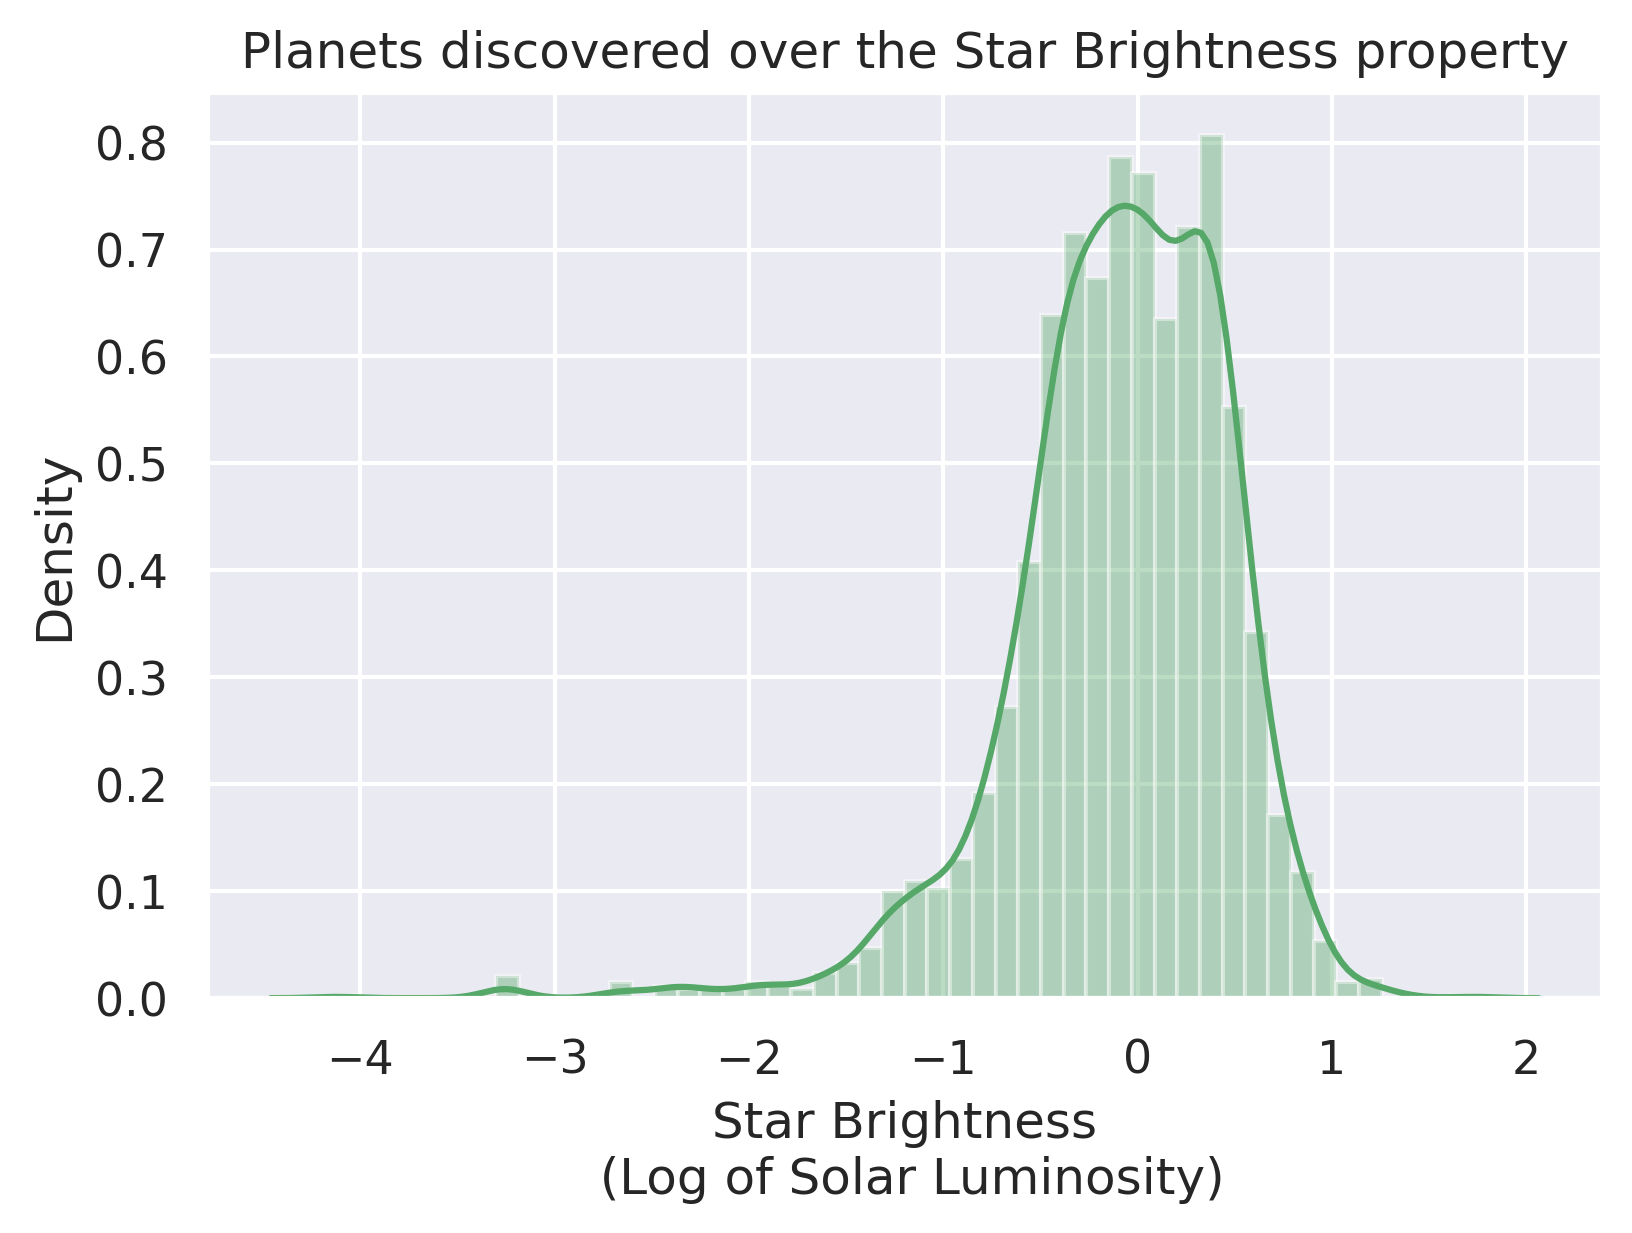

In [21]:
sns.distplot(x=df['star_bright'], color=choice(colors))
plt.title(f'Planets discovered over the Star Brightness property')
plt.xlabel('Star Brightness\n (Log of Solar Luminosity)')
plt.show()

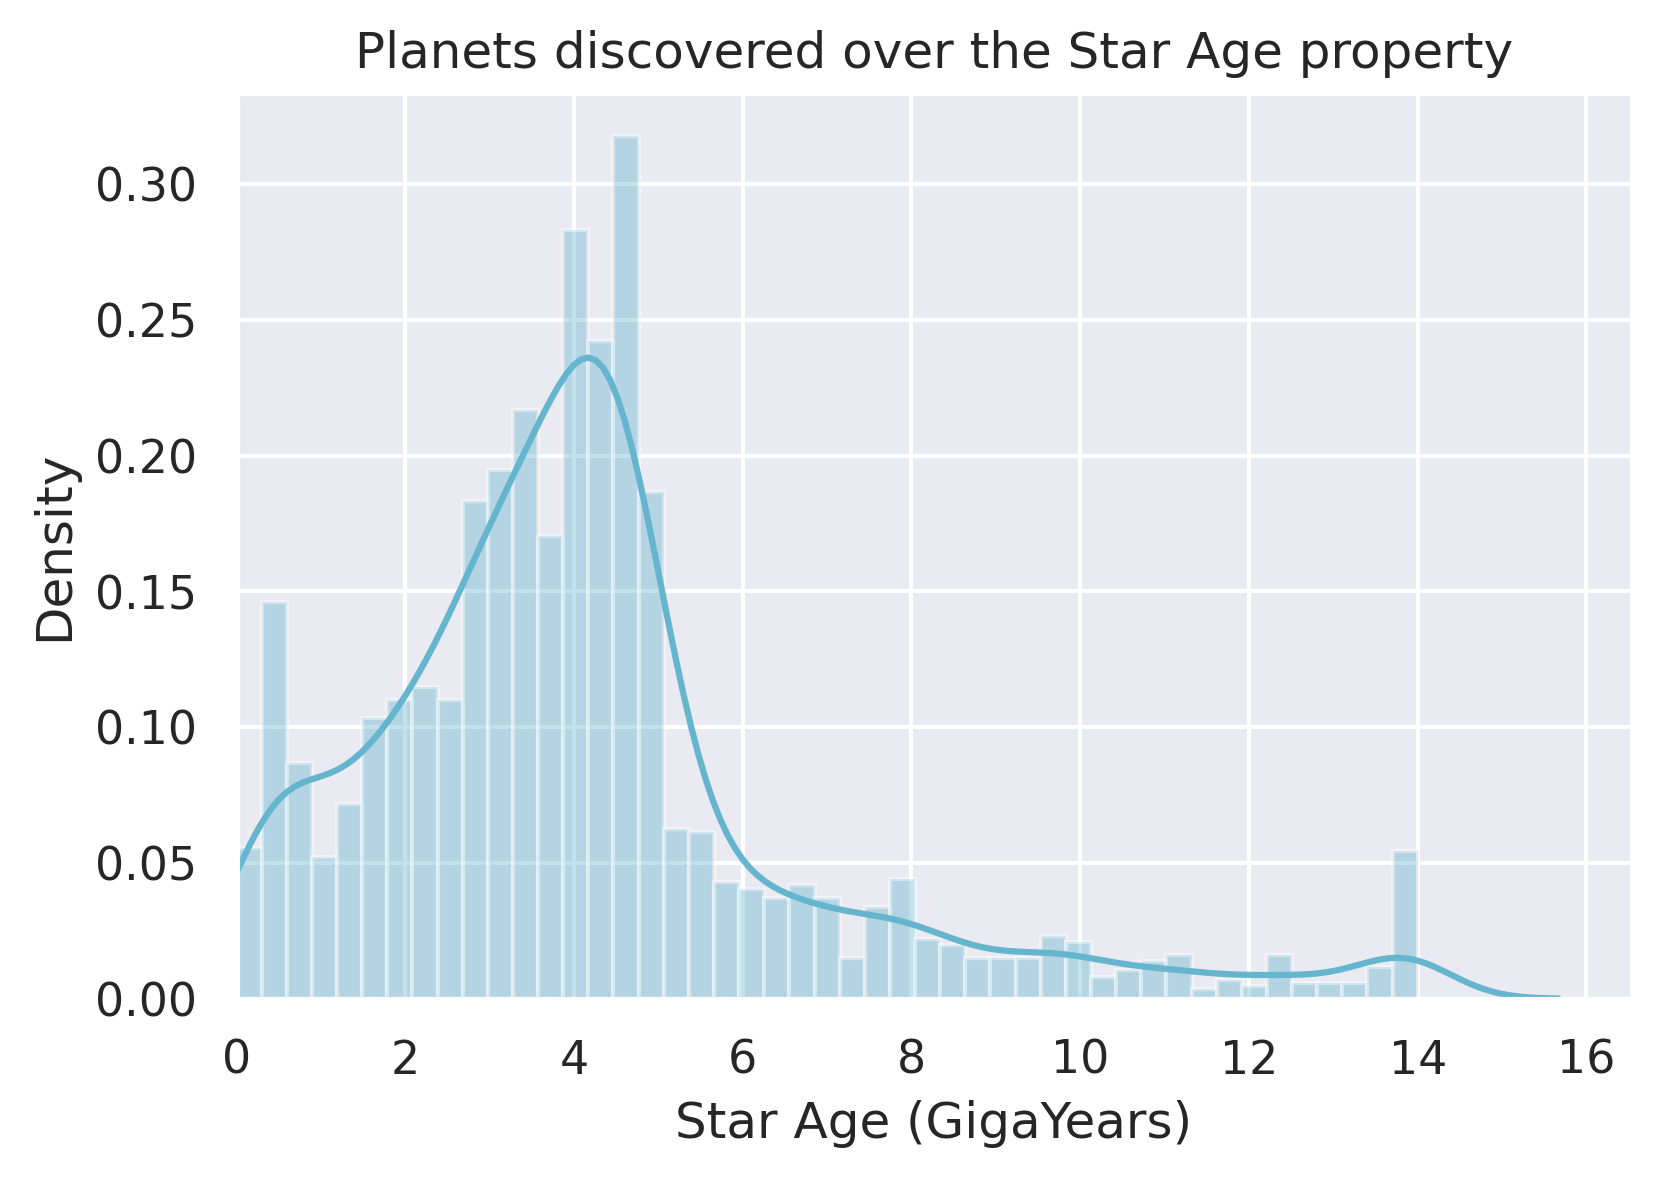

In [22]:
sns.distplot(x=df['star_age'], color=choice(colors))
plt.title(f'Planets discovered over the Star Age property')
plt.xlabel('Star Age (GigaYears)')
plt.xlim(0, None)
plt.show()

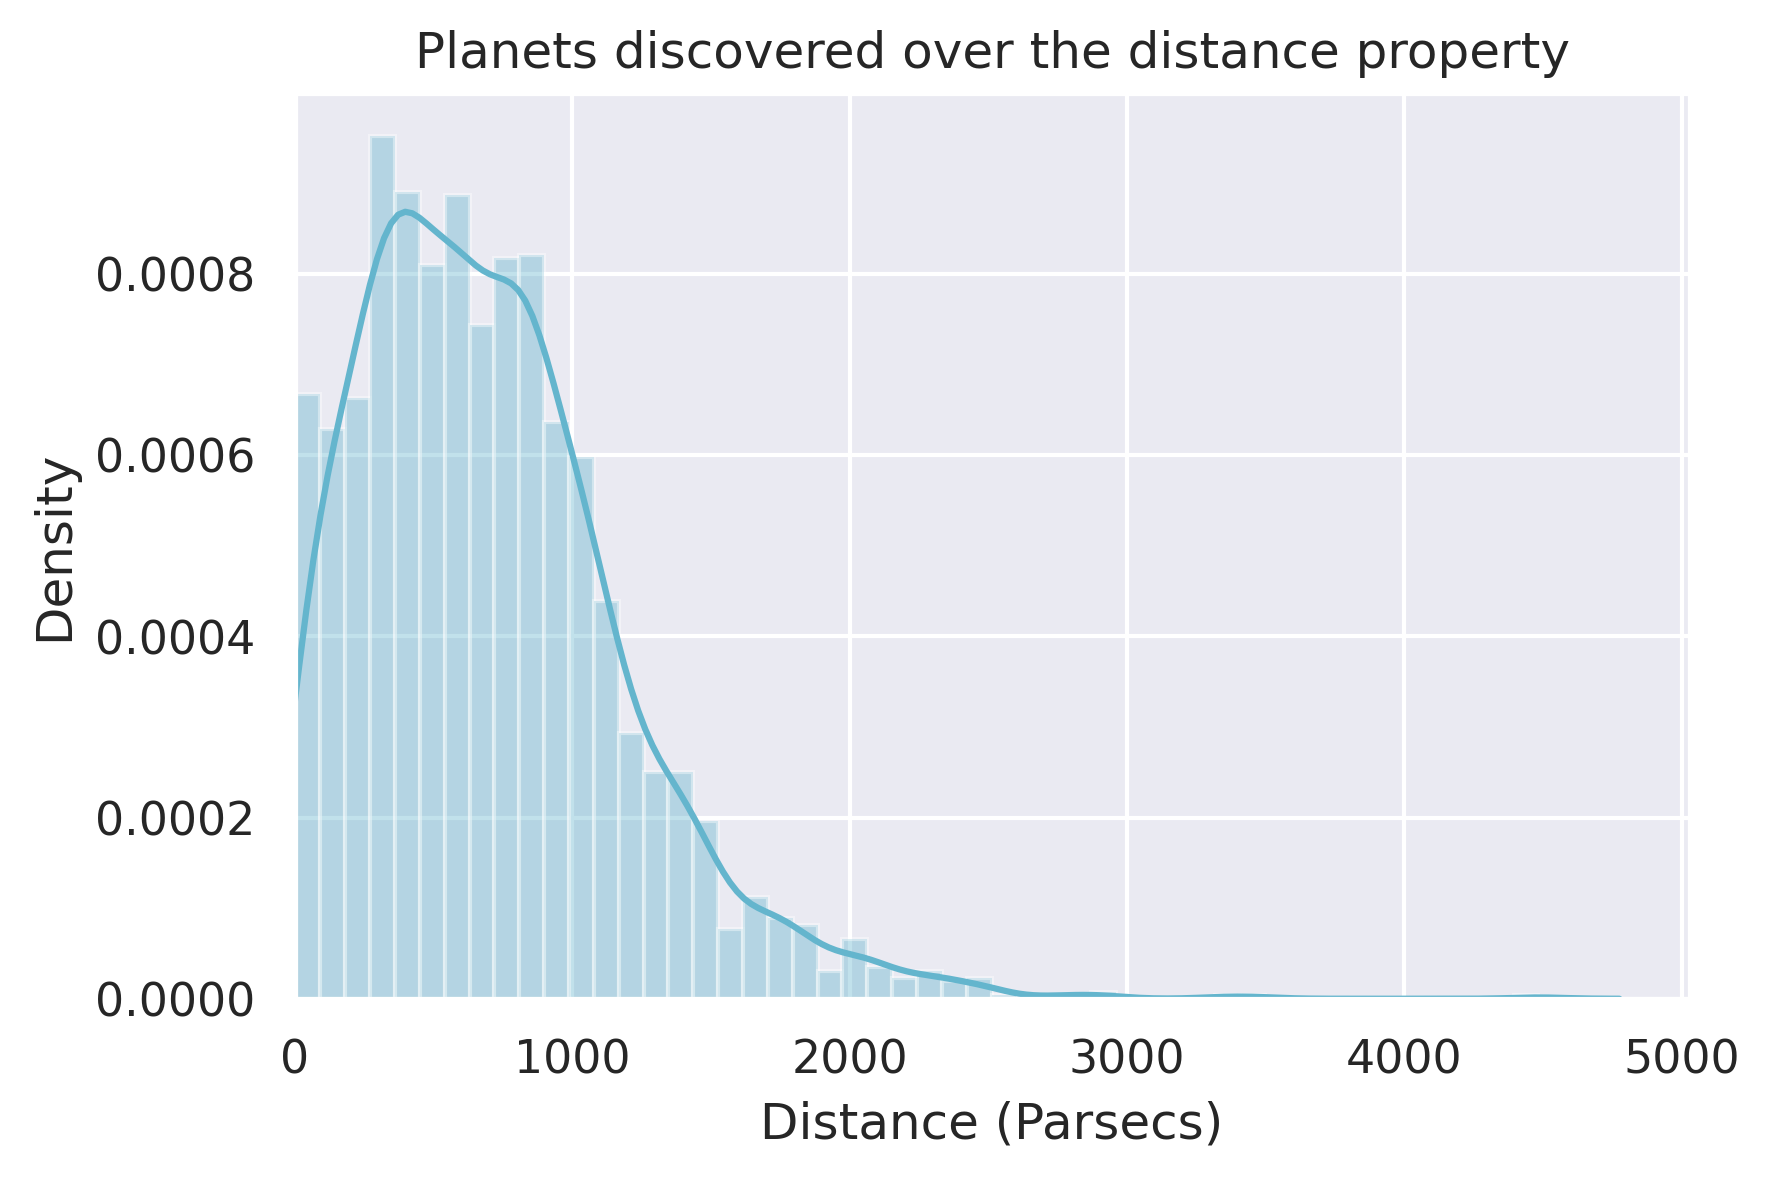

In [23]:
sns.distplot(x=df['distance'], color=choice(colors))
plt.title(f'Planets discovered over the distance property')
plt.xlabel('Distance (Parsecs)')
plt.xlim(0, None)
plt.show()

The above graphs are single value density plots used to describe the distribution of certain features in our dataset.

Most of the above follow a normal skewed normal distribution. However, the first plot depicting planet radius conatains two peaks. 
We suspect that the first peak at about 2.5 due to the Keplar mission, which had the goal of discovering Earth-like planets. Further investigation (See below) revealead that Keplar was responsible for the majority of our data points. This may explain how extreme the peak is, in comparison to the peak at 13.

The right skewed nature of the 'planets discovered over the distance property', supports our assumption that exo-planets are harder to discover as distance increases. 

### **Double Variable Visualistion**

#### Discovered planets against the number of stars of the same system

<function matplotlib.pyplot.show>

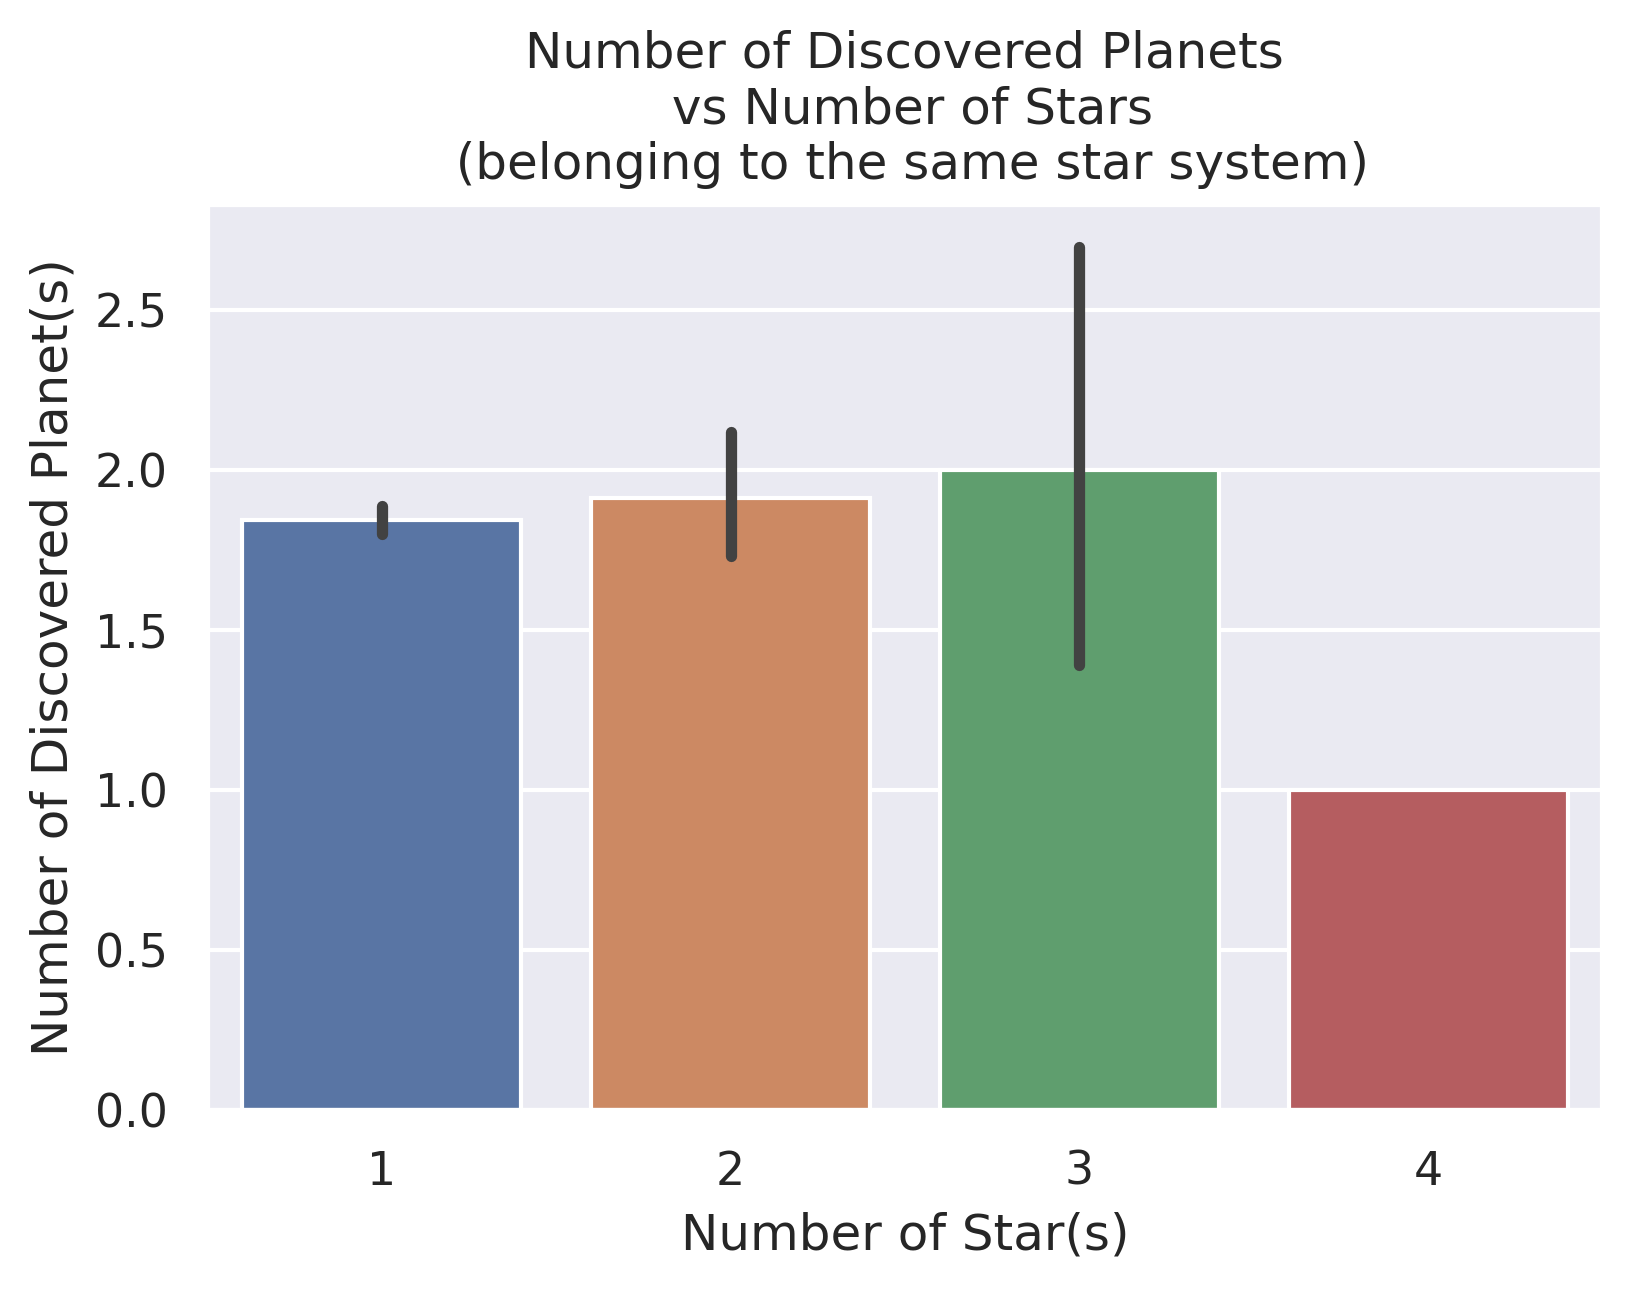

In [24]:
sns.barplot(y='num_planet', x='num_star', data=df)
plt.title('Number of Discovered Planets\n vs Number of Stars\n (belonging to the same star system)')
plt.xlabel('Number of Star(s)')
plt.ylabel('Number of Discovered Planet(s)')
plt.show

The above graph demonstrates the likelihood of multiple planet discoverabity depending upon the amount of stars in a system. 

Tri and Binary Star Systems are protrayed to yeild a greater rate of planet discovery within the same system when compared against singular and quad systems. This may be due to a few reasons:


1. Methods such as "the so-called radial velocity method to detect the periodic red and blue-shifting of starlight as the star and planet orbit around their common center of mass", commonly strive when multiple light sources (stars) are present.
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4253839/)
2. As noted by The Astronomical Journal, observations of multi-star systems are often more focused and prolonged compared to singular systems. Research into such systems are often based off the stars themselves rather than their planets. Consequently, equipment may be exposed to multi-stared systems for longer periods at a time, resulting in a higher probability of an orbiting planet wandering in front of the sun. (https://iopscience.iop.org/article/10.3847/1538-3881/ab4137)
3. The graph denotes a noticeably smaller number of planets discovered for quad star systems (double binary systems). This may be a result of sampling bias. Due to their extreme rarity and distance away from earth, they are often harder to discover and observe. Although being noted by NASA as being more common than once thought, we have managed to find two planets in a quad system as of 2015. (https://exoplanets.nasa.gov/news/185/four-fathers-new-exoplanet-discovery-part-of-a-quadruple-star-system/)

#### Planet discoveries based upon their orbital period and orbital radius

Text(0.5, 0, 'Orbital Period\n (per Earth days)')

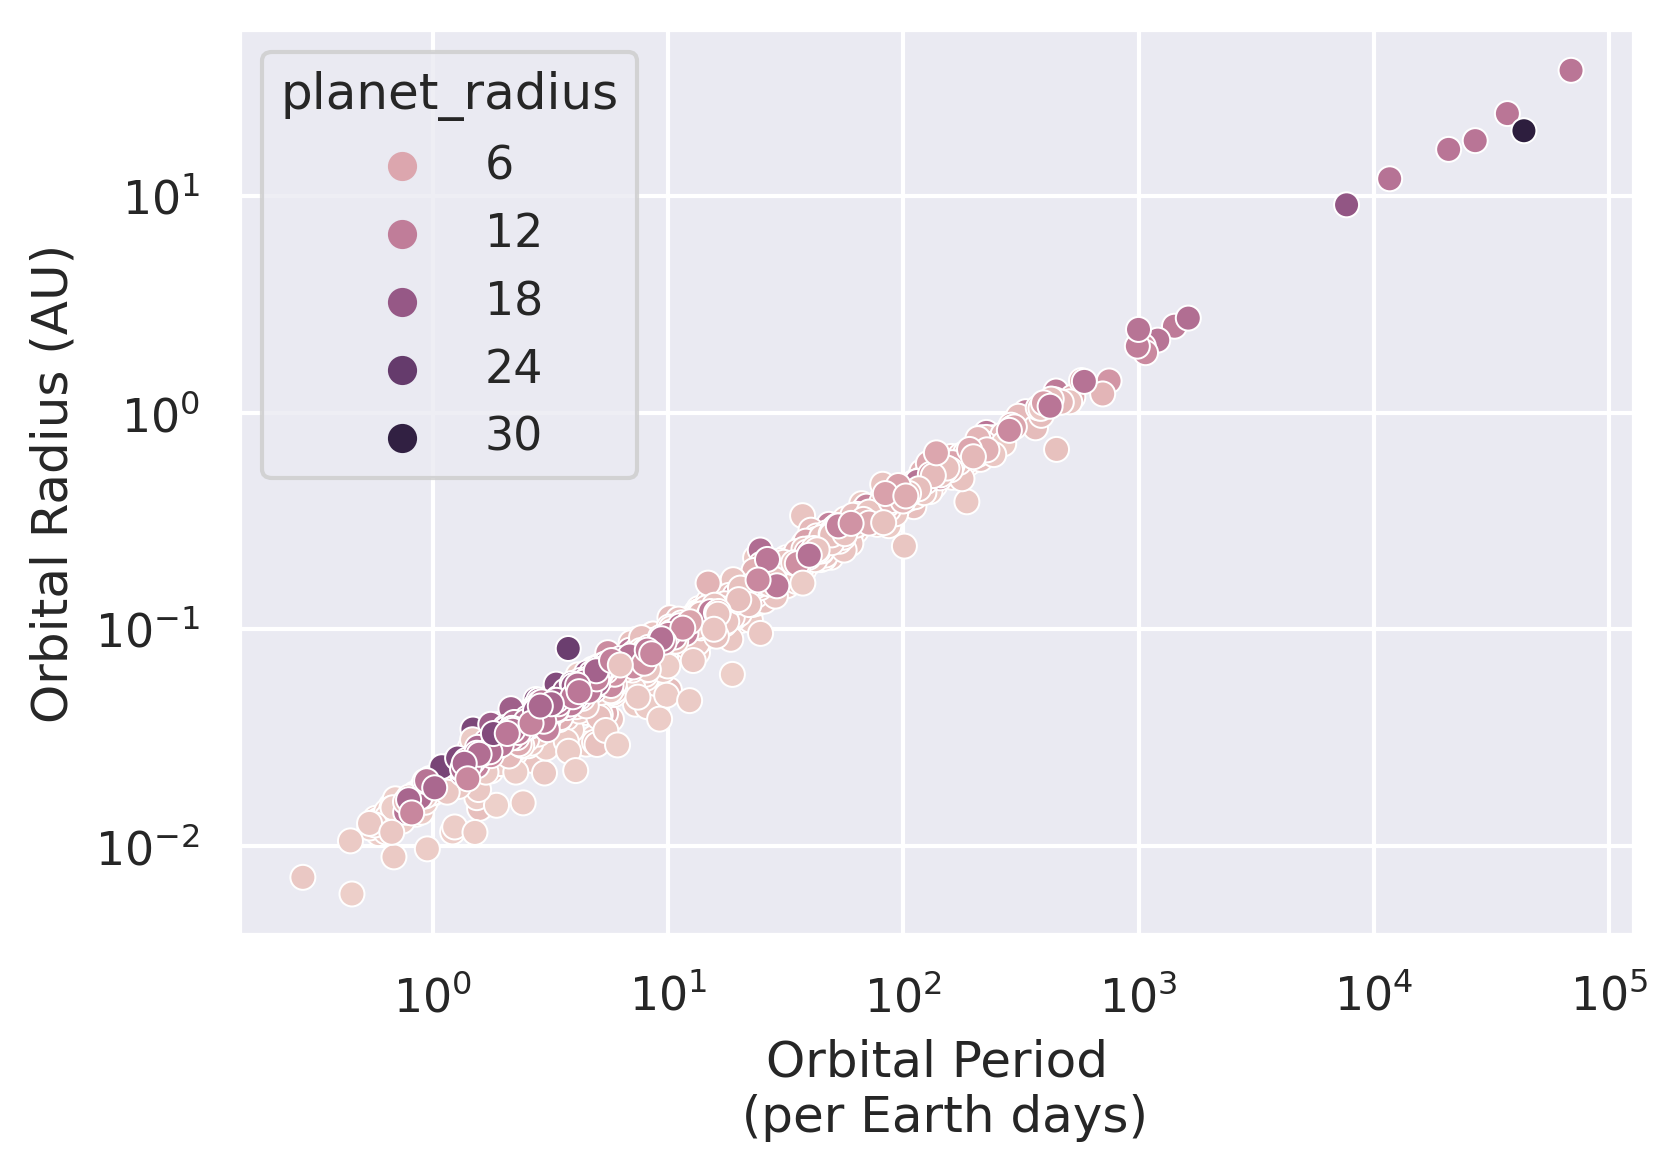

In [25]:
plt.xscale('log')
plt.yscale('log')
sns.scatterplot(data=df, x="orbital_period", y="semi-major_axis", alpha=1, hue="planet_radius")
plt.ylabel('Orbital Radius (AU)')
plt.xlabel('Orbital Period\n (per Earth days)')

This plot depicts a strong correlation between the orbital period of an exo-planet and it's semi-major axis. The semi-major axis is a good estimate of the distance that the planet orbits around it's star. it's only an estimate as orbits may not be perfectly circular.

This relationship makes sense, as the orbital period and orbital distance are approximated well using Keplar's orbital formula. (5) Any datapoint which does not follow the strong corellation in this graph, interestingly, many of the exo-planets with short orbital periods (Bottom left of the graph) fall below the otherwise straight line. To further understand this relationship, the datapoints were coloured based on the exo-planet's radius. All of the datapoints which fall below the otherwise straight line happen to be smaller planets. While it is out of the scope of this study, we suspect that this anomoly could be caused by the affects of General Relativity, similarly to how our neighbouring planet mercury's orbit, differs from Kelpar's formula due to these affects. (6)



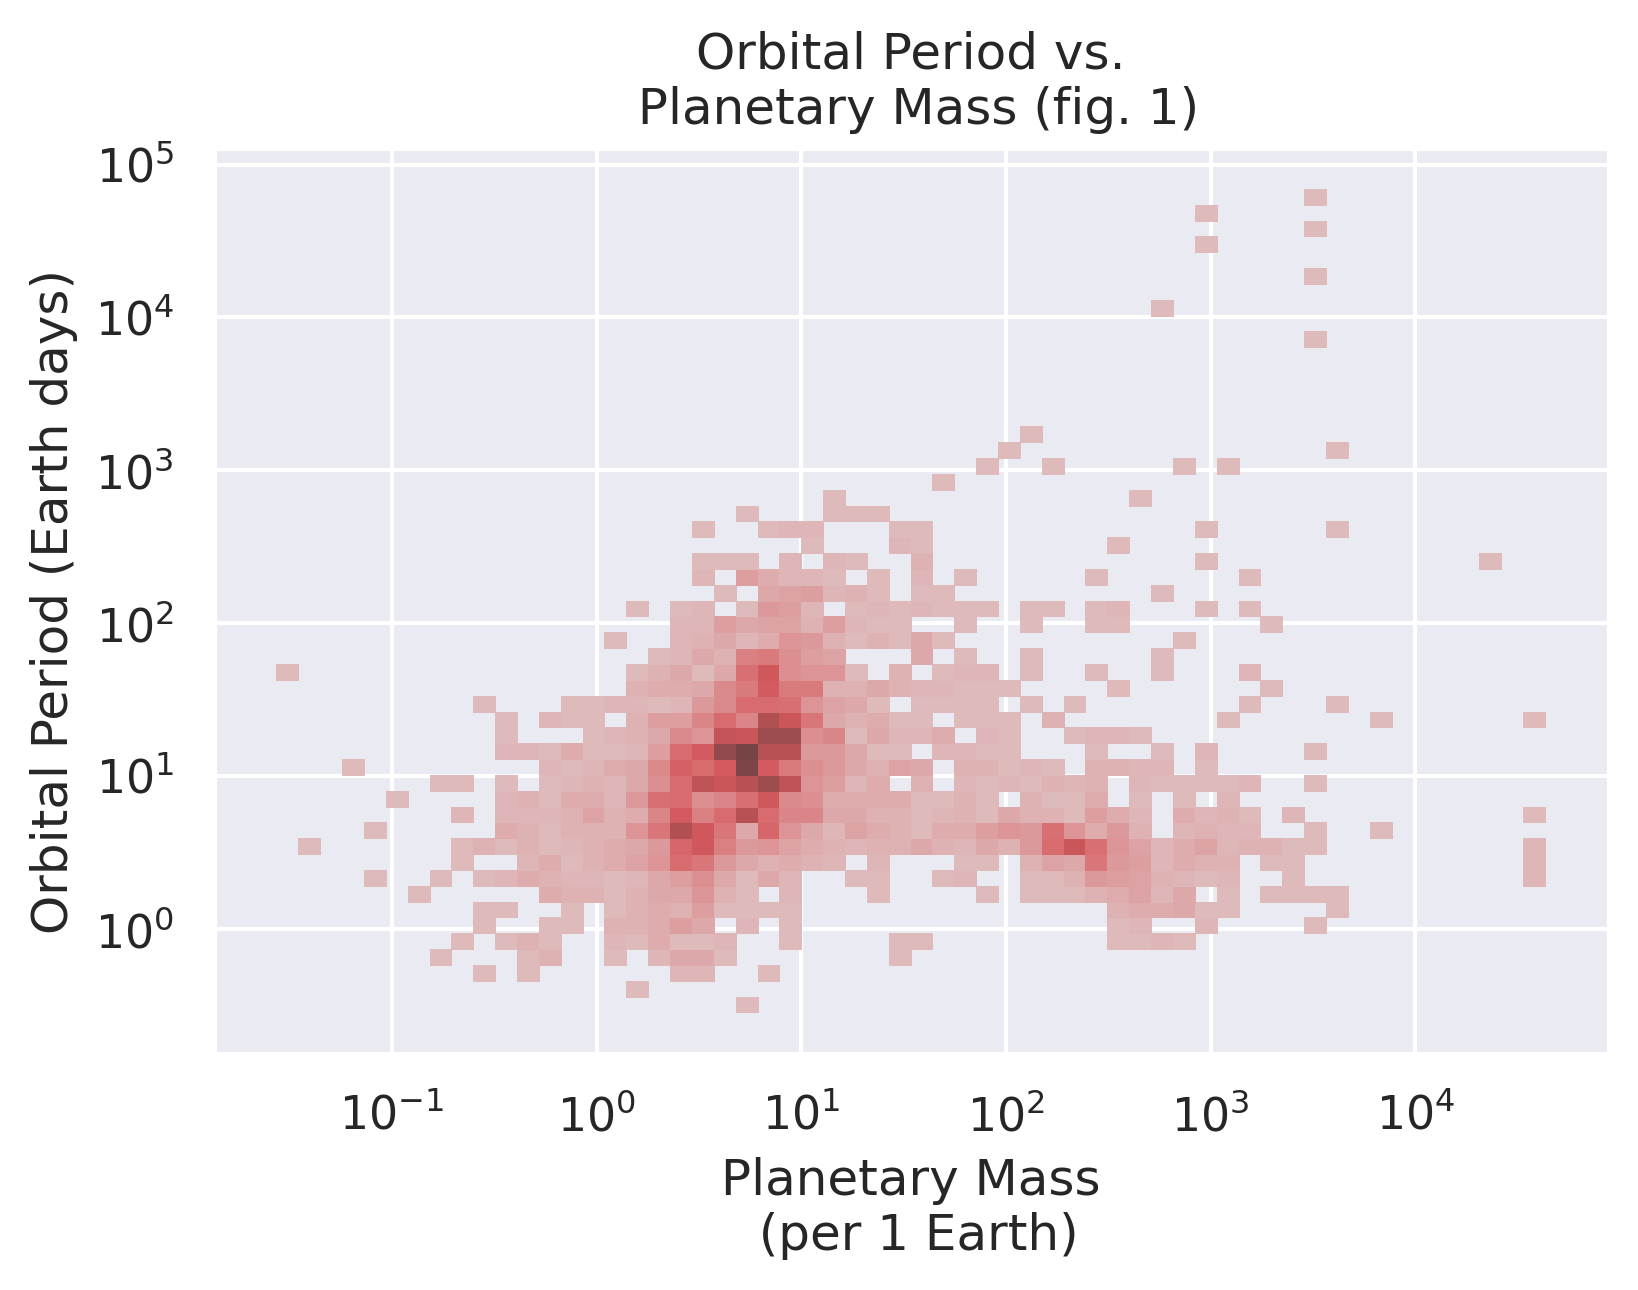

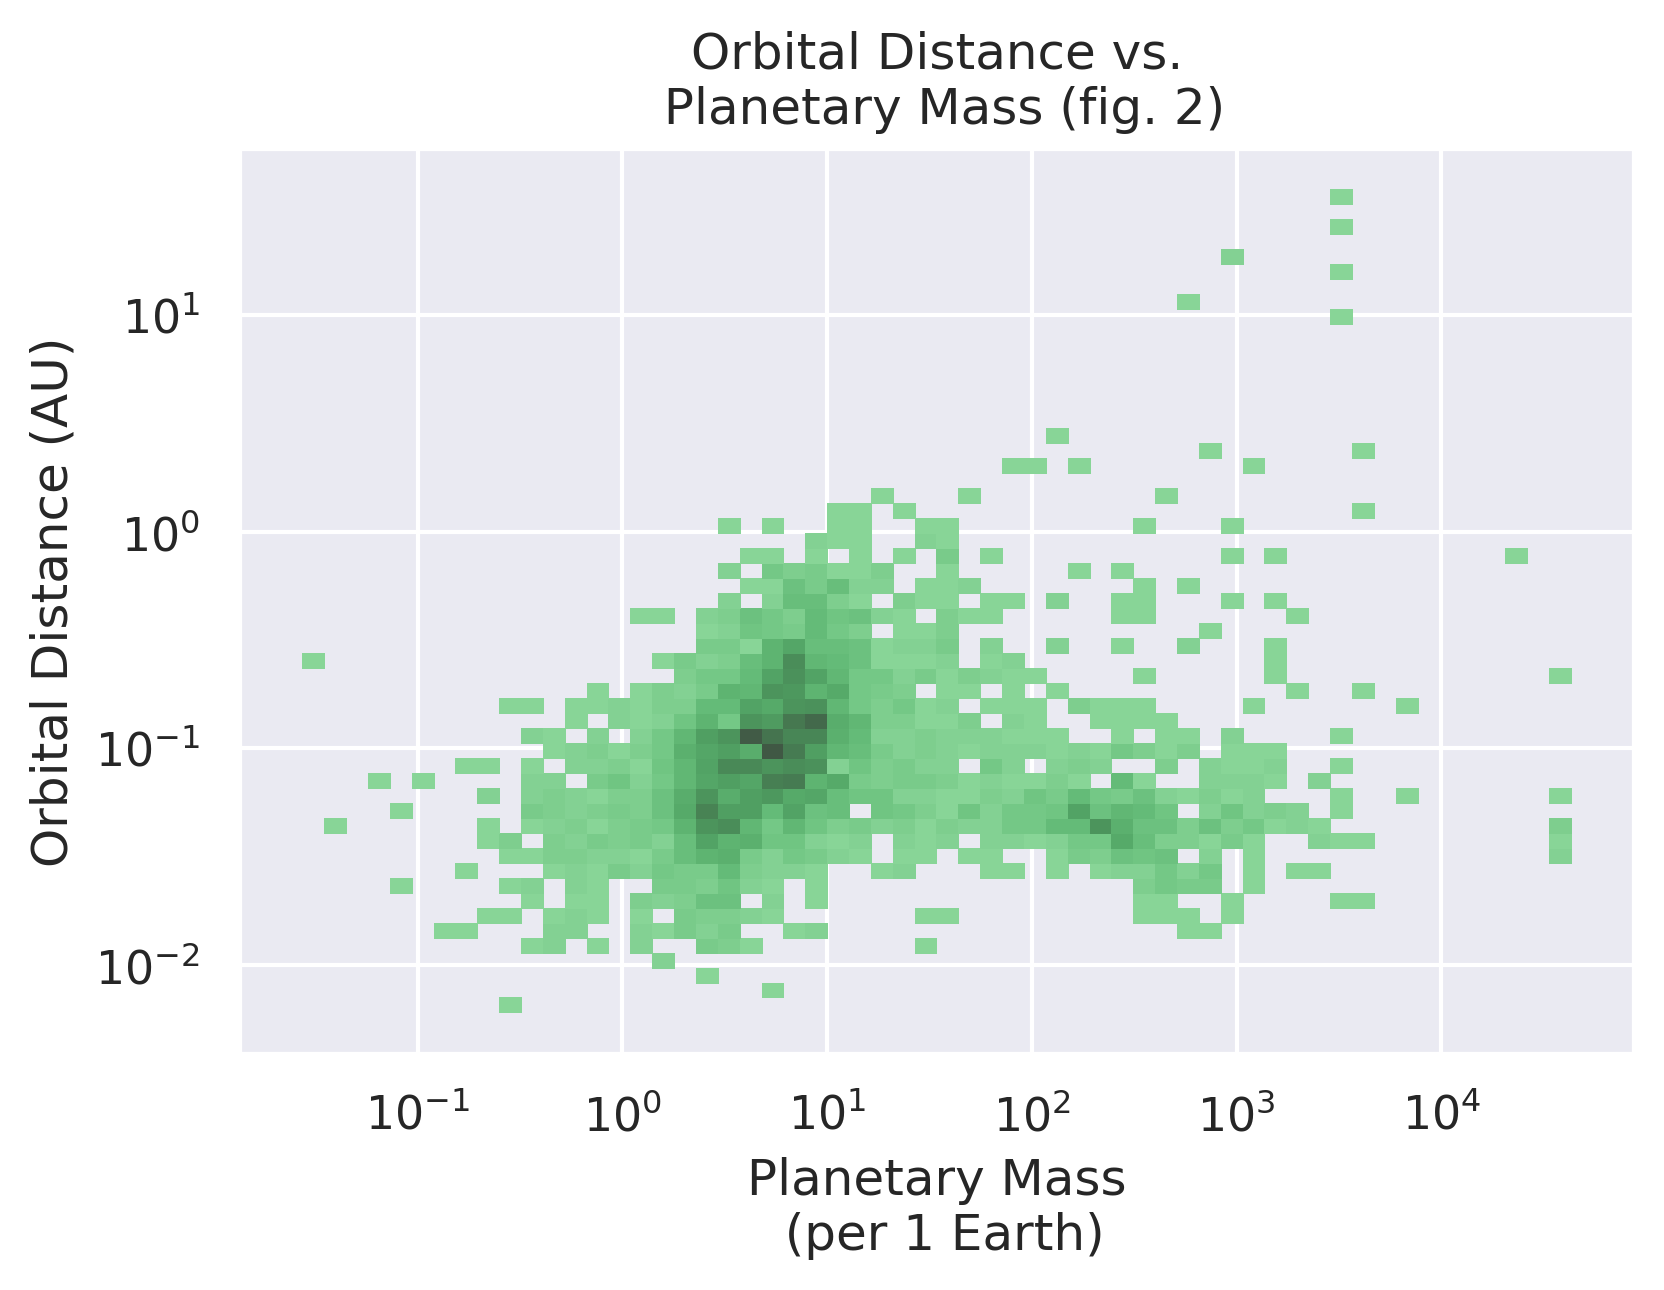

In [26]:
plt.xscale('log')
plt.yscale('log')
sns.histplot(data=df, x="planet_mass", y="orbital_period", color='r')
plt.title('Orbital Period vs.\n Planetary Mass (fig. 1)')
plt.xlabel('Planetary Mass\n (per 1 Earth)')
plt.ylabel('Orbital Period (Earth days)')
plt.show()
print('========')
plt.xscale('log')
plt.yscale('log')
sns.histplot(data=df, x="planet_mass", y="semi-major_axis", color='g')
plt.title('Orbital Distance vs.\n Planetary Mass (fig. 2)')
plt.xlabel('Planetary Mass\n (per 1 Earth)')
plt.ylabel('Orbital Distance (AU)')
plt.show()

Figure 1 shows a weak, but growing relationship between planetary mass and its orbital period influencing its discovery. However, the graph strongly favours a central hotspot, indicating that most planets discovered tend to have similar mass and orbital properties to that of earth. 

Figure 2 demonstrates a weak, but growing relationship between planetary mass and its radial orbiting distance as factors influencing its discovery. This graph draws significant parallels to figure 1, and features a similar central hotspot indicating earth like patterns.

Planetary mass, radial orbiting distance, and orbital period are key factors identified to both play an important role in planet discovery. As visualised in figure 1 and figure 2, some important patterns were noted:
-  Both fig. 1 and fig. 2 demonstrates a certain hotspots in which most of planet discovery was made. As such, most discoveries were made with planets with similar orbiting period and planetary mass as Earth; indicating lighter planets that are more tightly packed to the sun may not have casted a significant shadow (or has been blurred out by its star's light) for any of earth-based equipment to detect any noticeable change. In contrast, a weak correlation may be drawed upon between larger planets having longer orbit time and distances. However, the frequency of such planey discovery tends be comparatively lower than the rest of the dataset. A possible explanation describes planets on longer orbit periods may have a drastically reduced chance of crossing the sun during the duration of our equipment being pointed at that particular star system. Given that NASA predicts some exoplanents posessing orbit periods of ten to ten thousand years, such an explanation seems to be quite probable. For other planets, NASA also predicts incredibly short orbits that may last for a couple of days, which explains the lack of extremely short orbital periods in fig 1. (https://exoplanets.nasa.gov/what-is-an-exoplanet/overview/)


#### Planet radius and their proximity to Earth

#### Mass to radius relation for discovered planets

Text(0.5, 0, 'Planetary Radius (per Earth radius)')

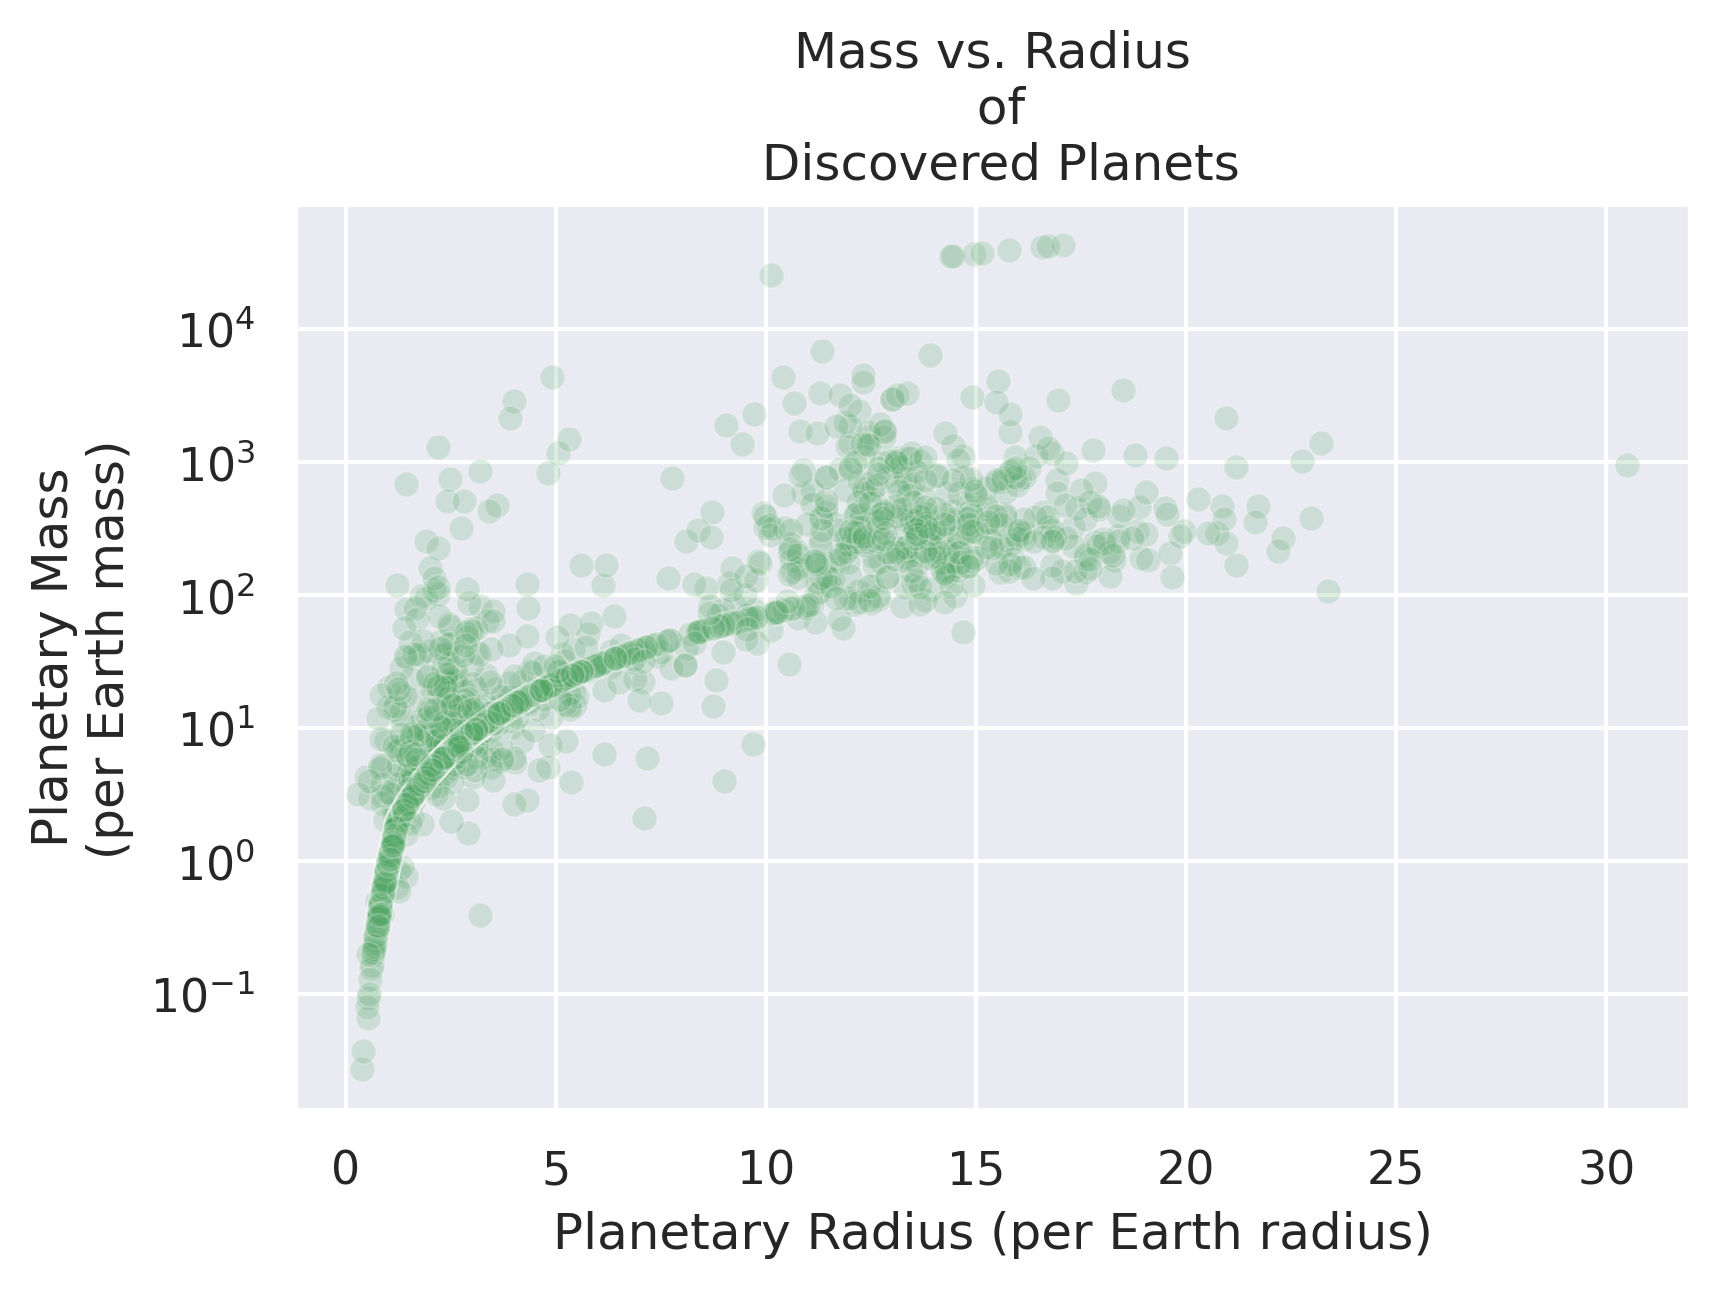

In [27]:
plt.yscale("log")
sns.scatterplot(y=df["planet_mass"], x=df["planet_radius"], alpha=0.2, color='g')
plt.title('Mass vs. Radius\n of\n Discovered Planets')
plt.ylabel('Planetary Mass\n (per Earth mass)')
plt.xlabel('Planetary Radius (per Earth radius)')

#### Planet count per system over Distance

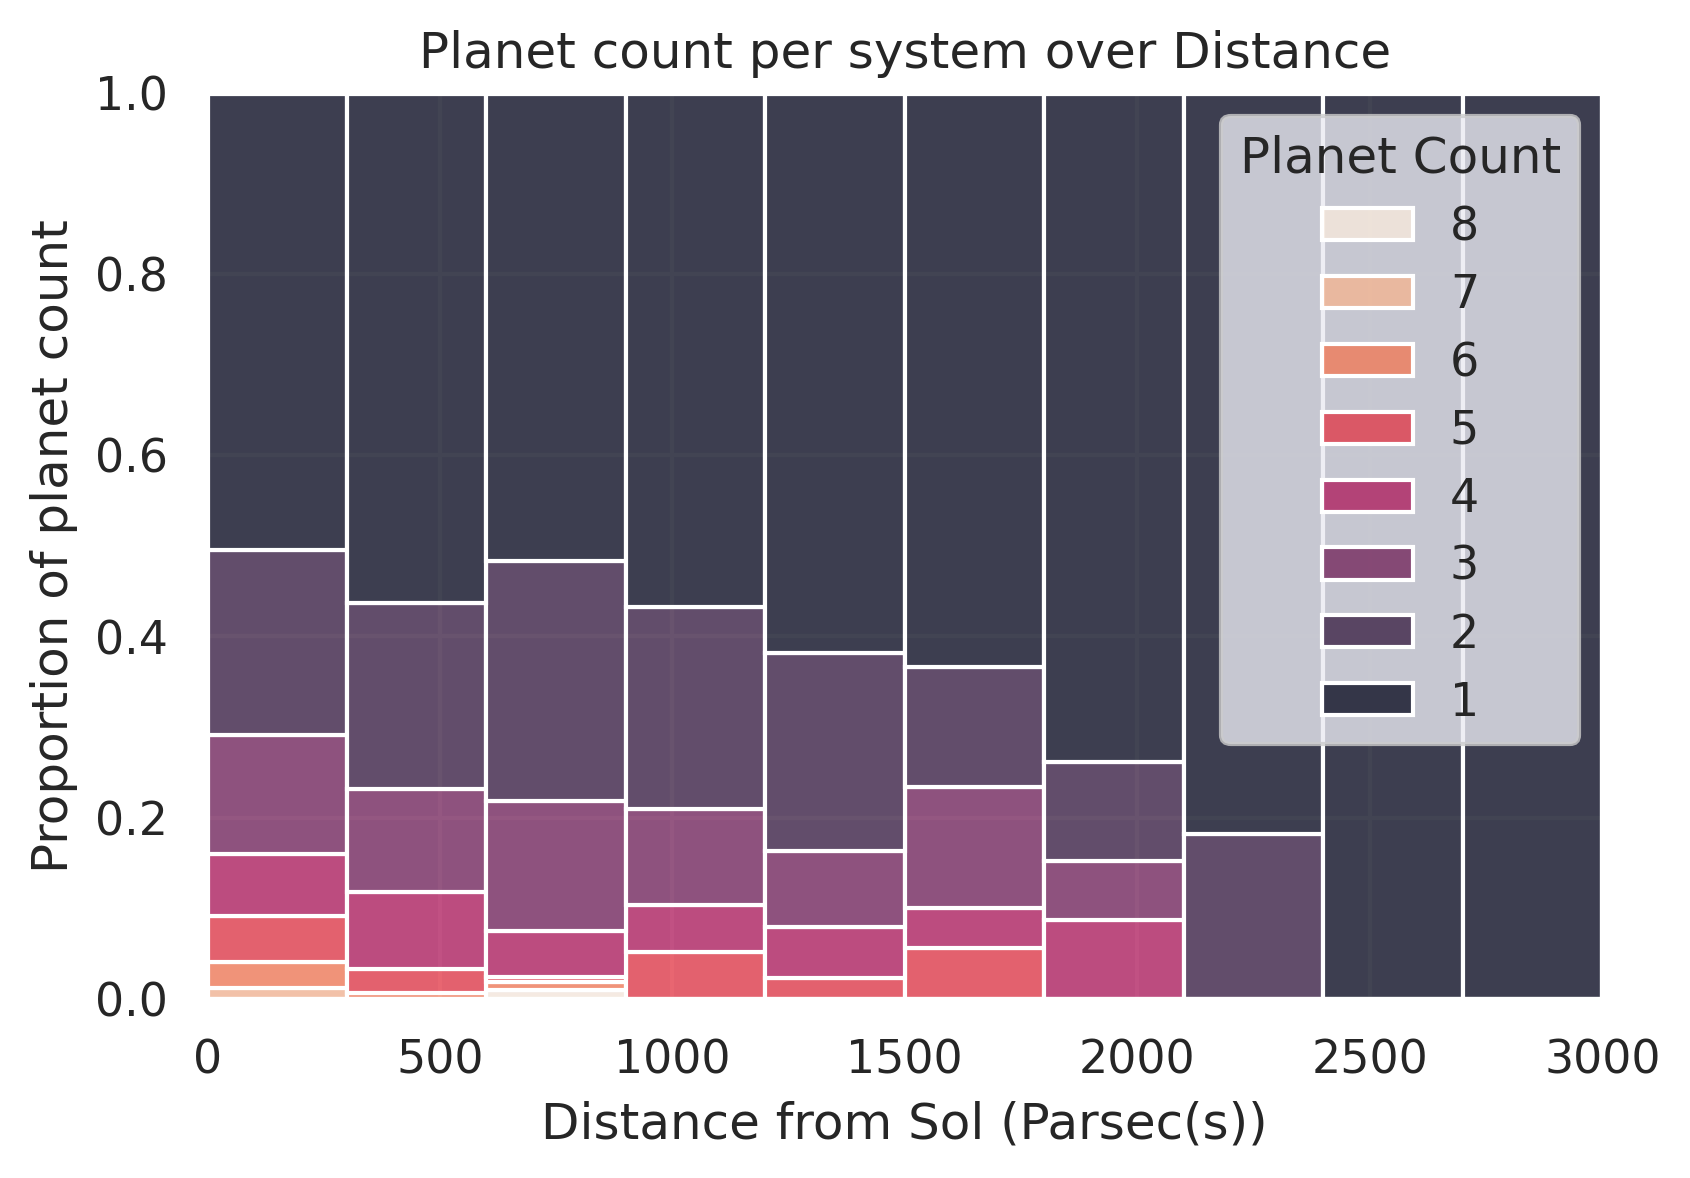

In [28]:
plot = sns.histplot(data=df, x="distance", hue="num_planet", multiple="fill", bins=10, binrange=(0, 3000), palette="rocket", legend="full")
plot.set(xlabel="Distance from Sol (Parsec(s))", ylabel="Proportion of planet count", title="Planet count per system over Distance")
plot.legend(title="Planet Count", loc="upper right", labels=[8,7,6,5,4,3,2,1])

This plot exemplifies a strong relationship between the the number of planets discovered per system, and the distance that system is from Earth, or our Sun. (Earth's average position in space is our Sun's position)

The first column of this graph shows almost 50% of systems having 2 or more exo-planets present. However, after 2500 parsecs, no system has more than 1 exo-planet discovered within it. This downwards trend seems to begin at 1000 parsecs. Note: Some discoveries exist beyond 3000 parsecs, but they are all 1 exo-planet systems.

The distance figure represents and average distance from earth at the time of discovery, and a possible explanation of the reduced number of planets in more distant systems is an increase in dificulty for discovery.

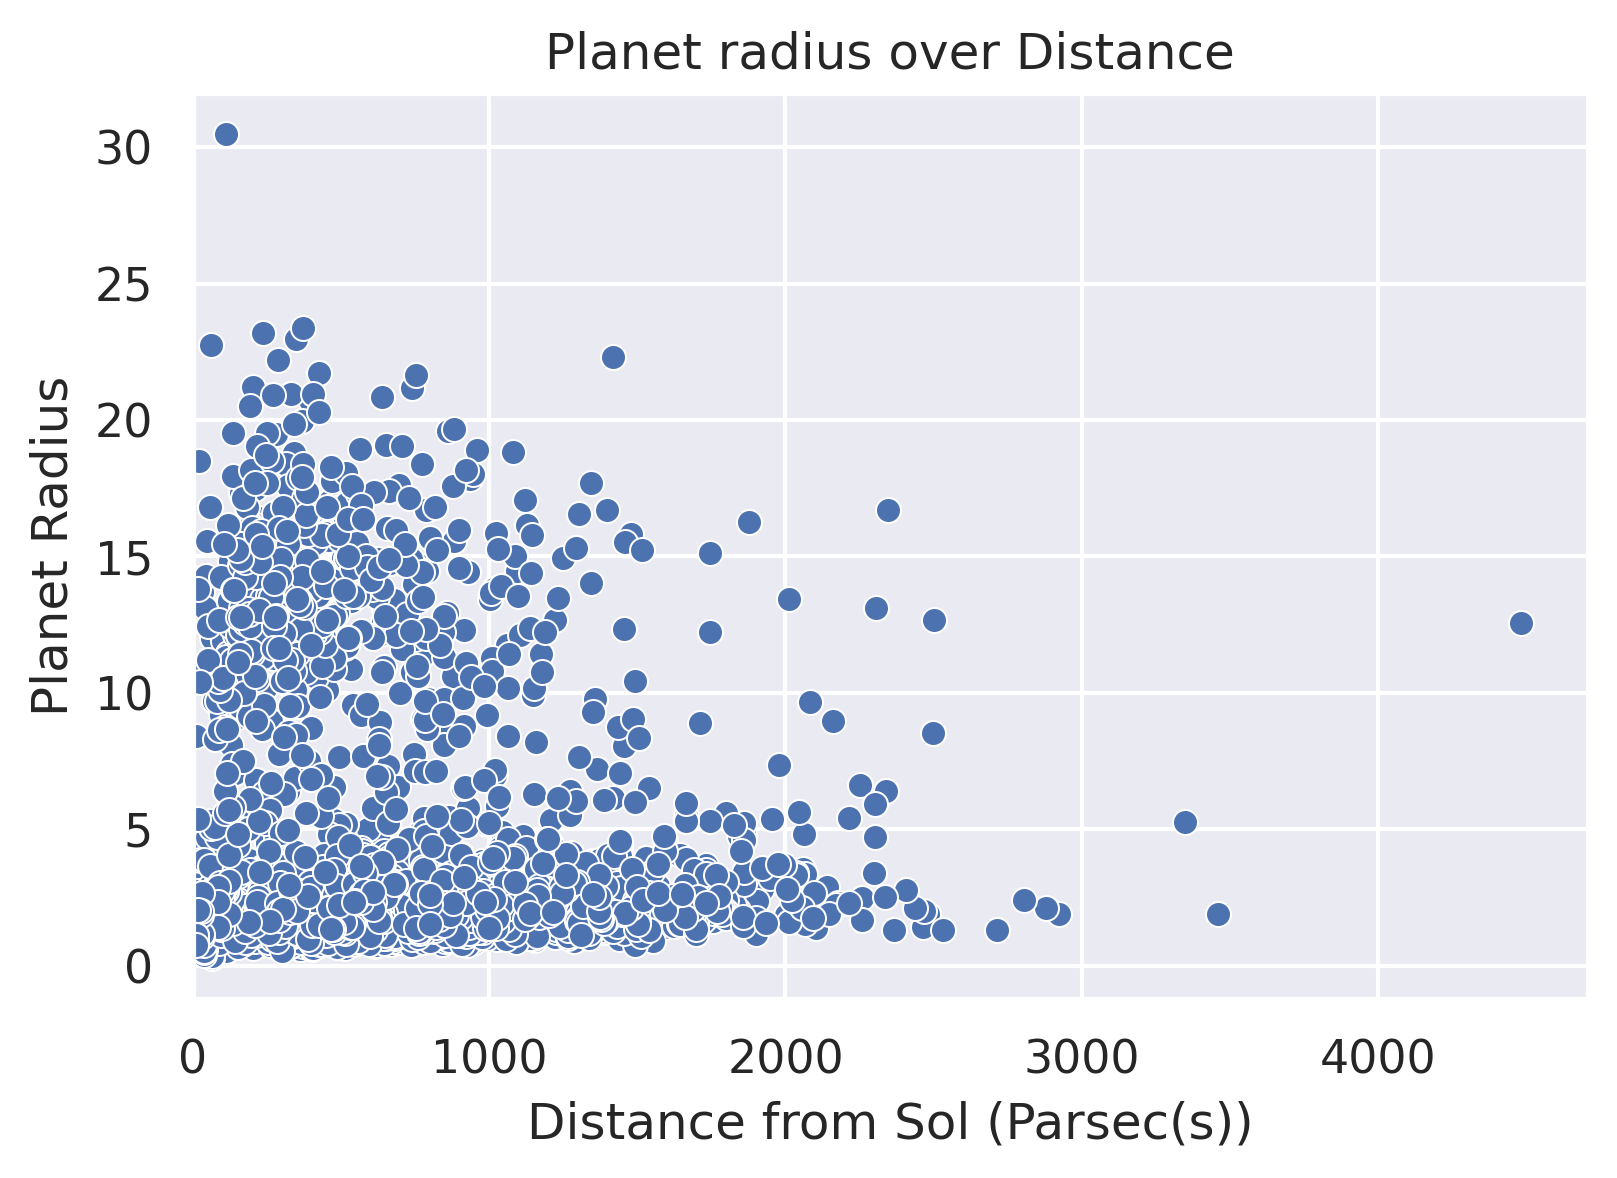

In [29]:
plot = sns.scatterplot(data=df, x="distance", y="planet_radius")
plot.set(xlabel="Distance from Sol (Parsec(s))", ylabel="Planet Radius", title="Planet radius over Distance", xlim=(0, None))
plot

This plot compares planet radius to distance. One notable feature of this plot is the slight upwards trend in the lower bound of the y axis. 
Whilst we have not explored this completely, this could be attributed to the difficulty of finding small planets as distance increases. 

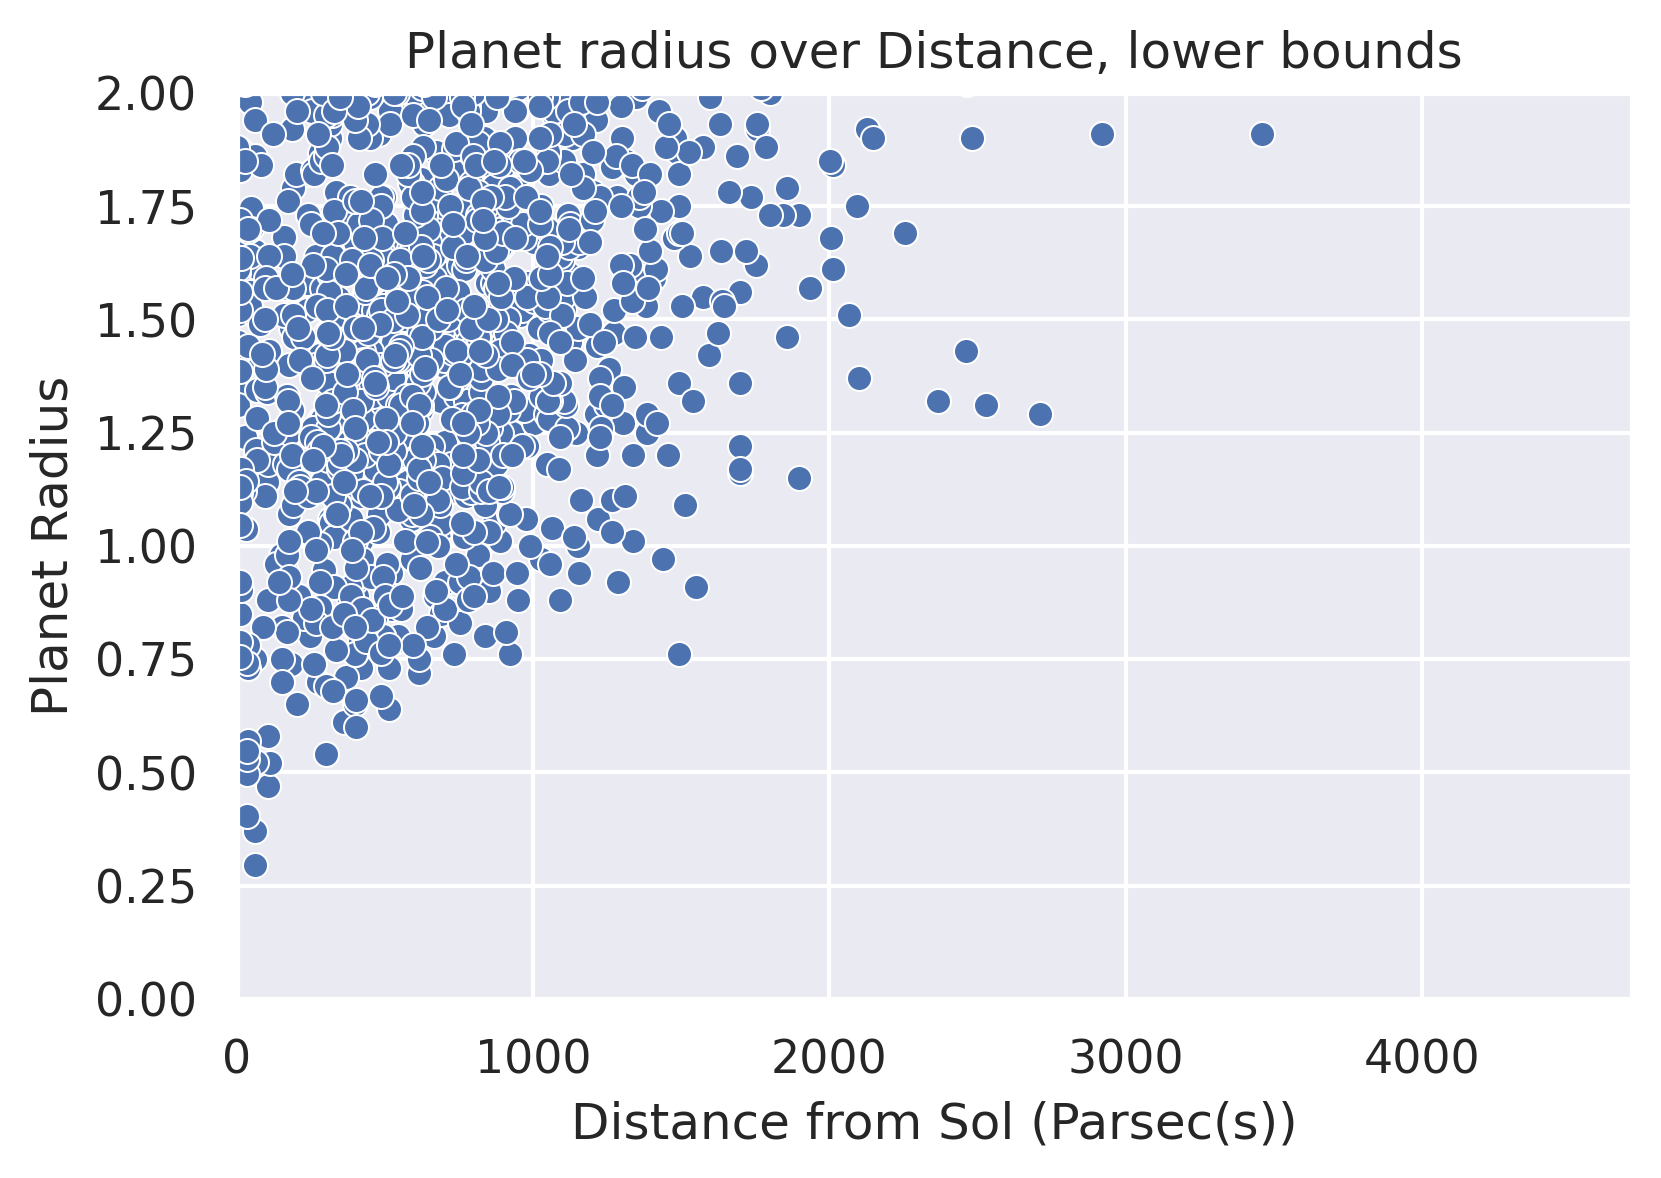

In [30]:
plot = sns.scatterplot(data=df, x="distance", y="planet_radius")
plot.set(xlabel="Distance from Sol (Parsec(s))", ylabel="Planet Radius", title="Planet radius over Distance, lower bounds", xlim=(0, None), ylim=(0,2))
plot

This is a closer view of the lower bounds of the previous graph. a radius of 1.0 is the radius of Earth. So from 2000 parsecs and beyond, no exoplanets smaller than Earth have been discovered.

### **Three Variable Visualisation**

#### Number of planets dependant of varying parallax in relation to its distance from our sun.

<function matplotlib.pyplot.show>

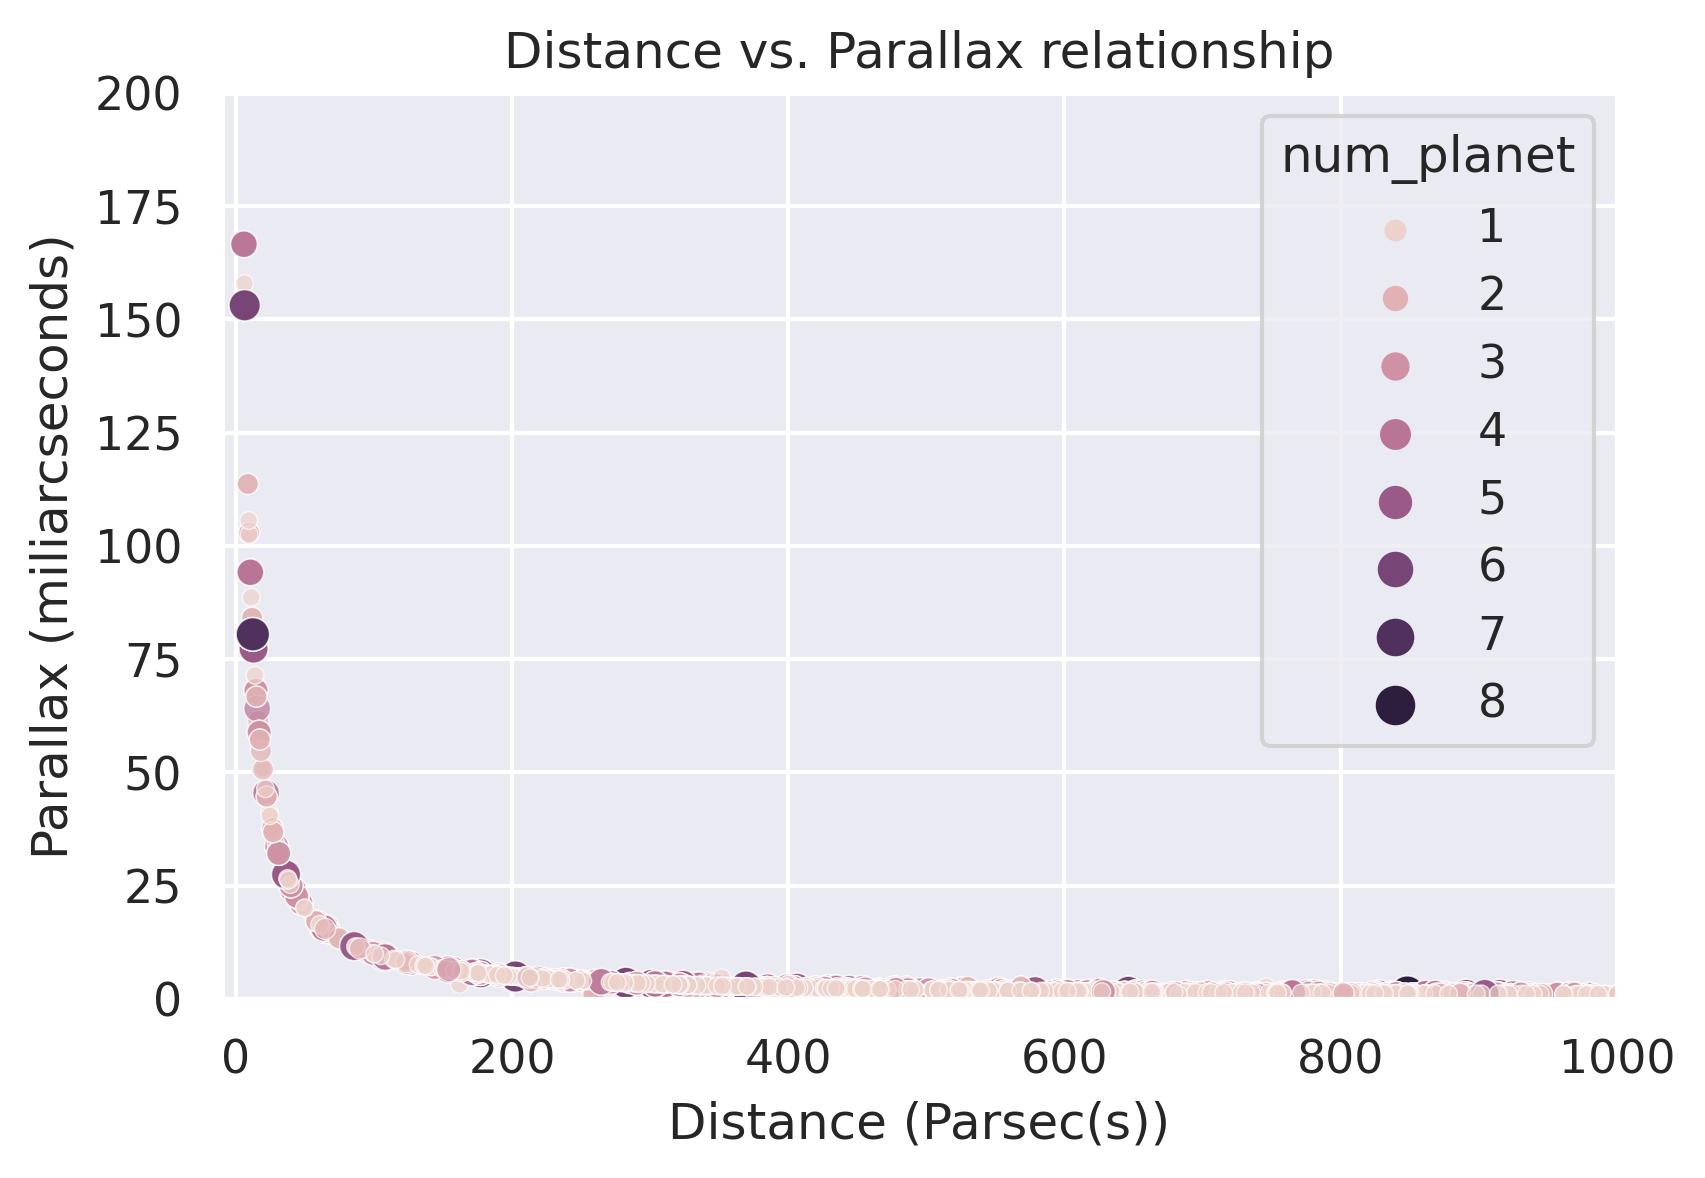

In [31]:
plot = sns.scatterplot(x=df["distance"], y=df["parallax"], hue=df["num_planet"], size=df["num_planet"], legend="full", alpha=0.7)
plot.set(xlim = (-10, 1000), ylim=(0, 200), xlabel="Distance from Sol", ylabel="Parallax amount")
plt.title('Distance vs. Parallax relationship')
plt.xlabel('Distance (Parsec(s))')
plt.ylabel('Parallax (miliarcseconds)')
plt.show

This graph contains a strong relationship between the Distance of an exo-planet from our system, the amount of parallax we can see from Earth, and the number of planets in each exo-planet's system.

Parallax is the phenomenon of an object in space moving accross our night sky in relation to the other visible stars. Many of the "stars" we see in the night sky are actually entire galaxies, which are many orders of magnitude further away than stars in the milky way, which in turn are further away than planets in our own system. 

This plot shows that the amount of parallax we experience is inversely proportional to the distance the object is from us. 

#### Exo-planet projected location in relation to the number of planets discovered in its system

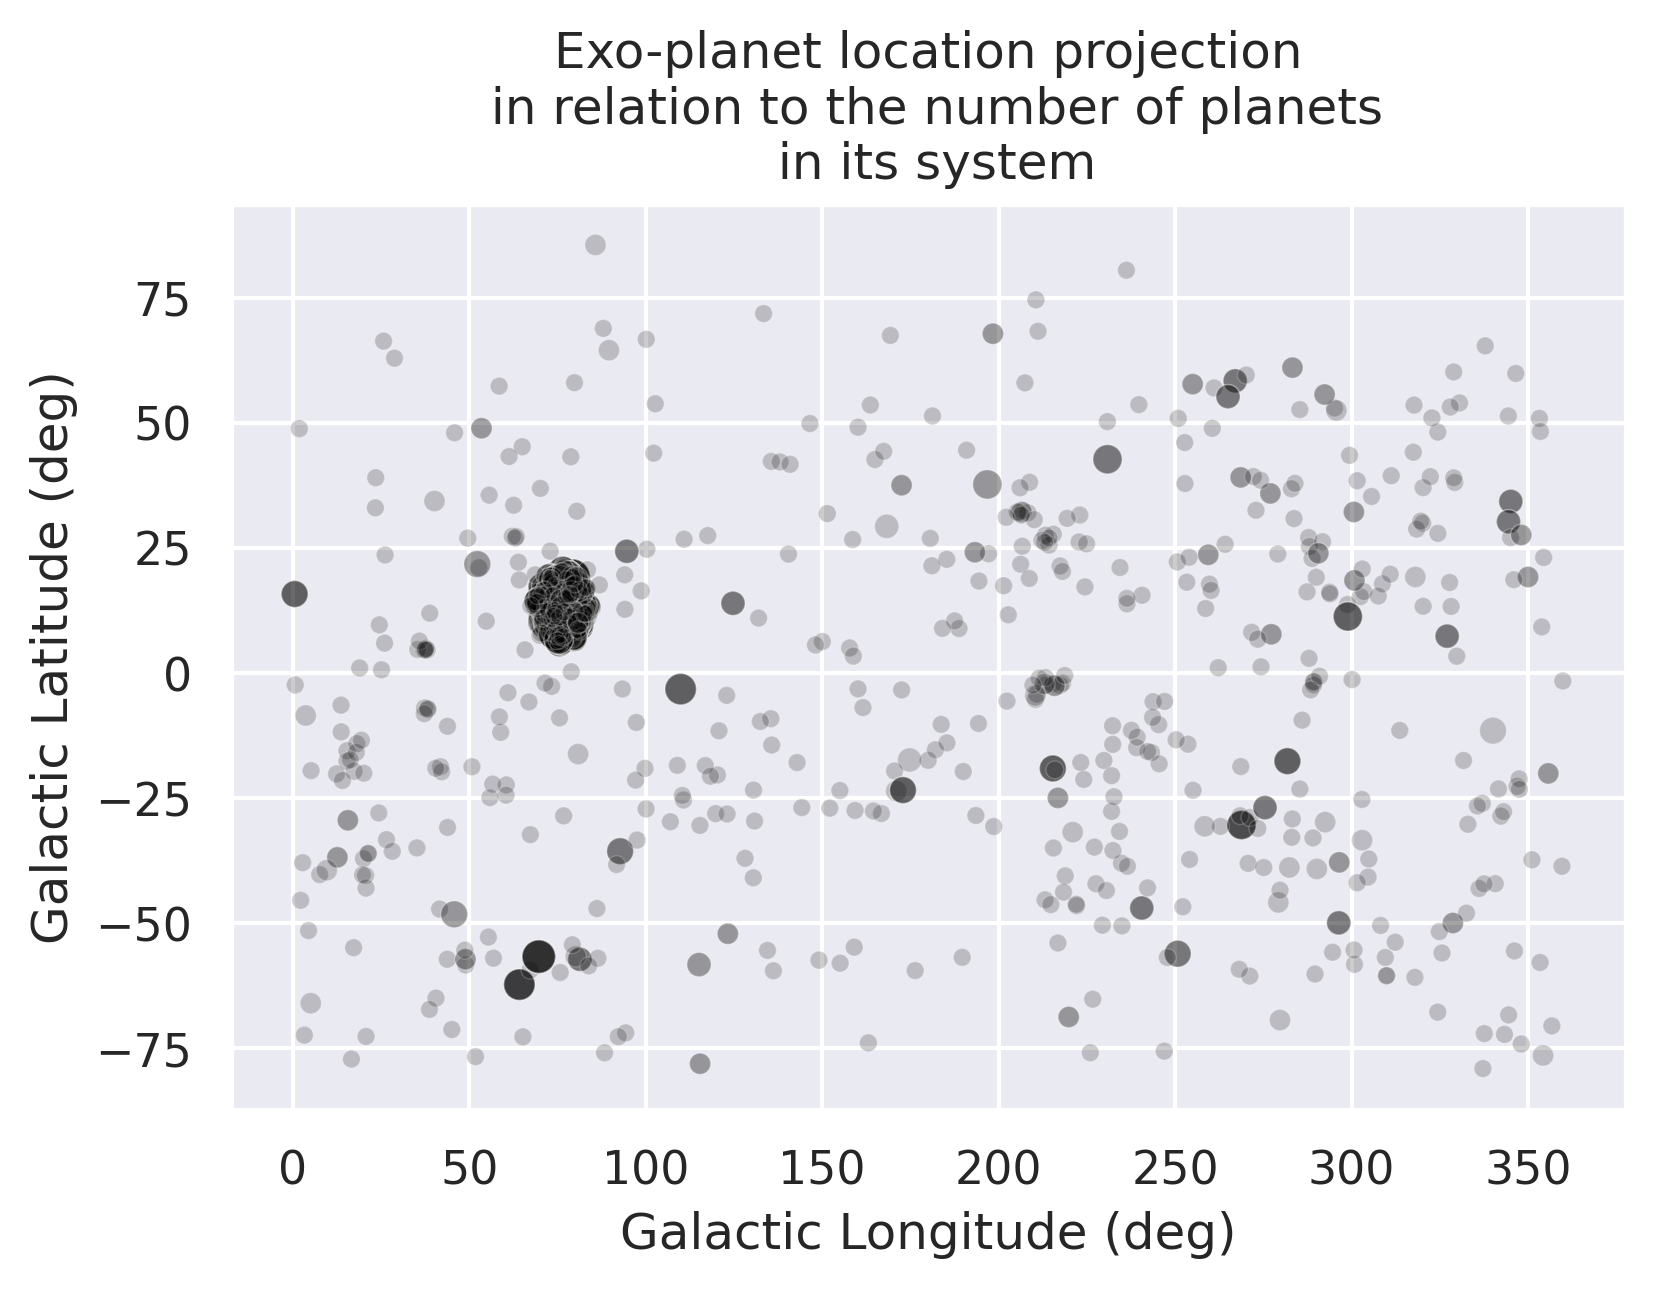

In [32]:
plot = sns.scatterplot(data=df, x="longitude_gal", y="latitude_gal", size="num_planet", palette='plasma', legend=False, alpha=0.2, color="black")
plot.set(xlabel="Galactic Longitude (deg)", ylabel="Galactic Latitude (deg)", title = "Exo-planet location projection\n in relation to the number of planets\n in its system")
plt.show()

This graph is a simple projection of the galactic coordinates of each discovered exo-planet. In addition to the galactic latitude, and longitude, we have altered the size of each datapoint based on the number of exo-planet's in that system.

Initially we suspected that the large cluster of exo-planets visible left of centre was the galactic centre. This was a logical conclusion, however, the coordinates do not match up.

Instead we concluded that one of the exo-planet surveying missions that contributed to our dataset focussed on a single location. This large spot makes up the majority of our datapoints. We have determined that this is the data from the Keplar mission. The next graph focuses on this data alone.

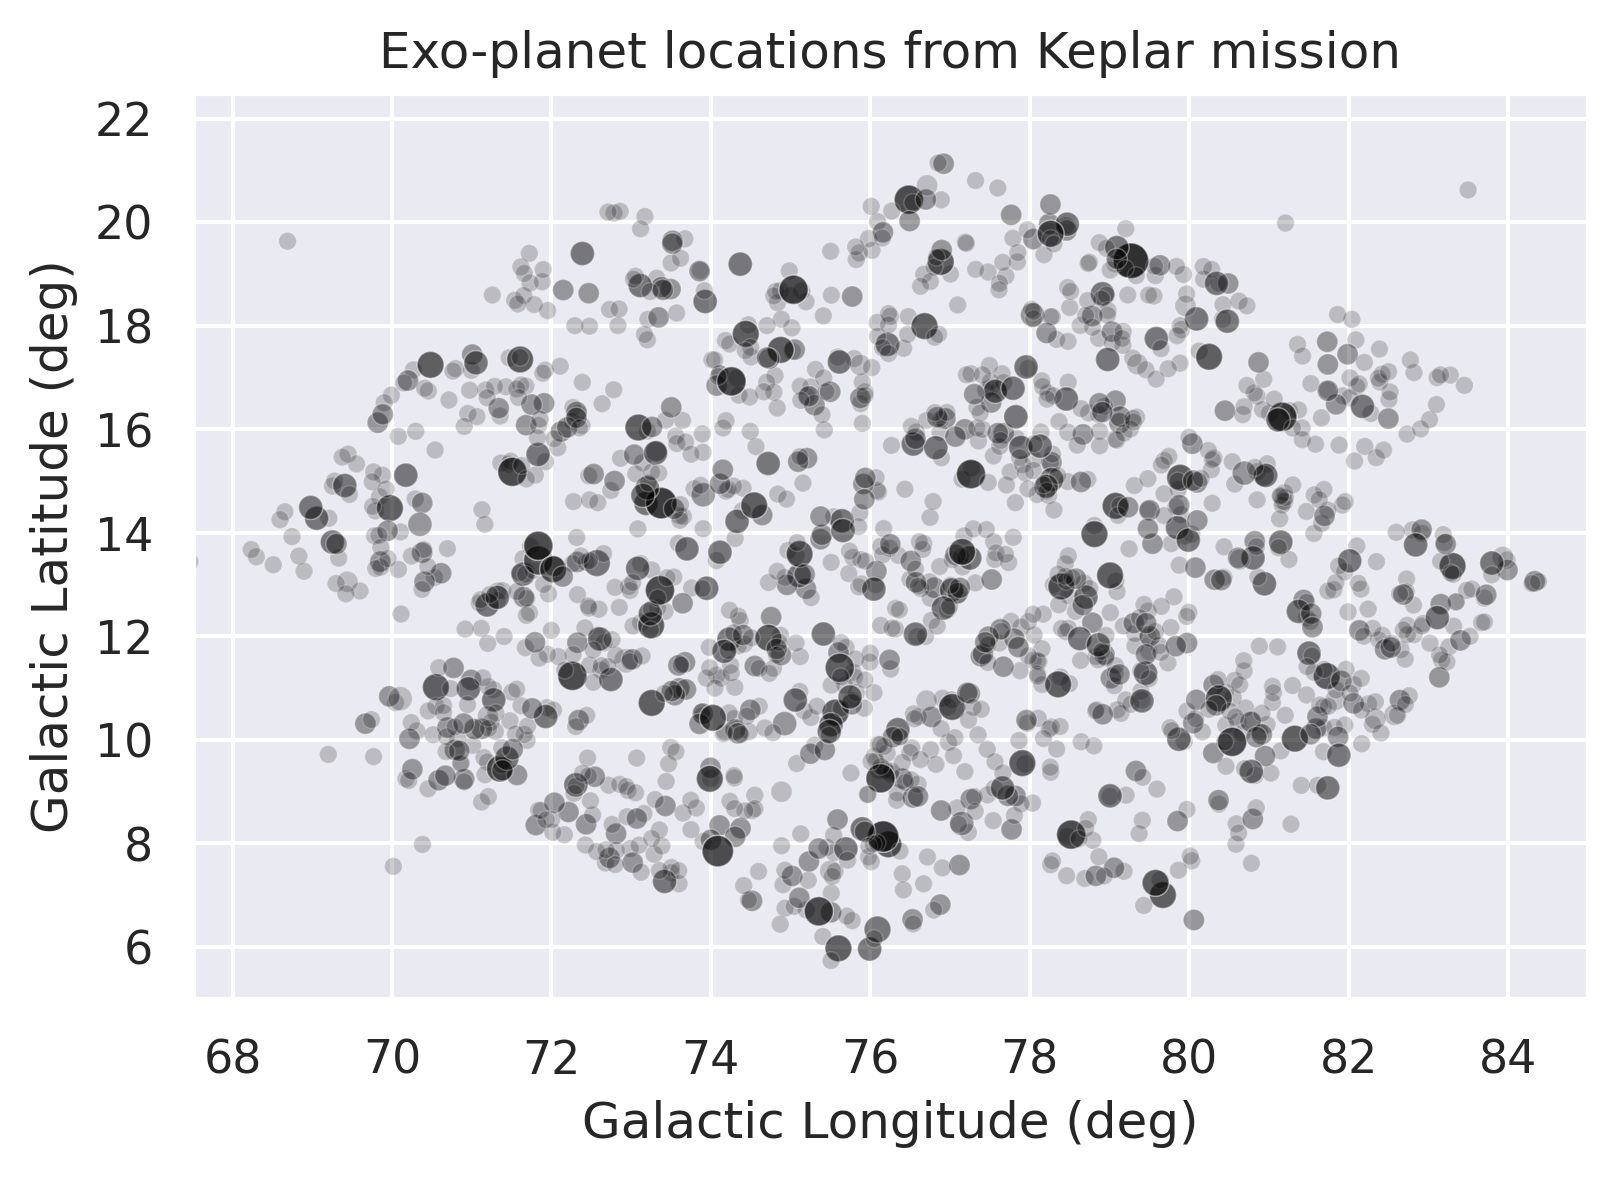

In [33]:
plot = sns.scatterplot(data=df, x="longitude_gal", y="latitude_gal", size="num_planet", palette='plasma', legend=False, alpha=0.2, color="black")
plot.set(xlabel="Galactic Longitude (deg)", ylabel="Galactic Latitude (deg)", title = "Exo-planet locations from Keplar mission", xlim=(67.5, 85), ylim=(5, 22.5))

plt.show()

This data accurately portrays the results from the Keplar mission. Each square visible is a sample taken by the orbital telescope. Keplar alone discovered over 3000 exo-planets. See Fig 1 from this source for another depiction of this data. (inlcuding stars where no exo-planets were found)

Source: https://www.aanda.org/articles/aa/full_html/2020/03/aa36692-19/aa36692-19.html (7)

Text(0.5, 0, 'Center white dot represents earth.\n Exo-planet sizes to scale')

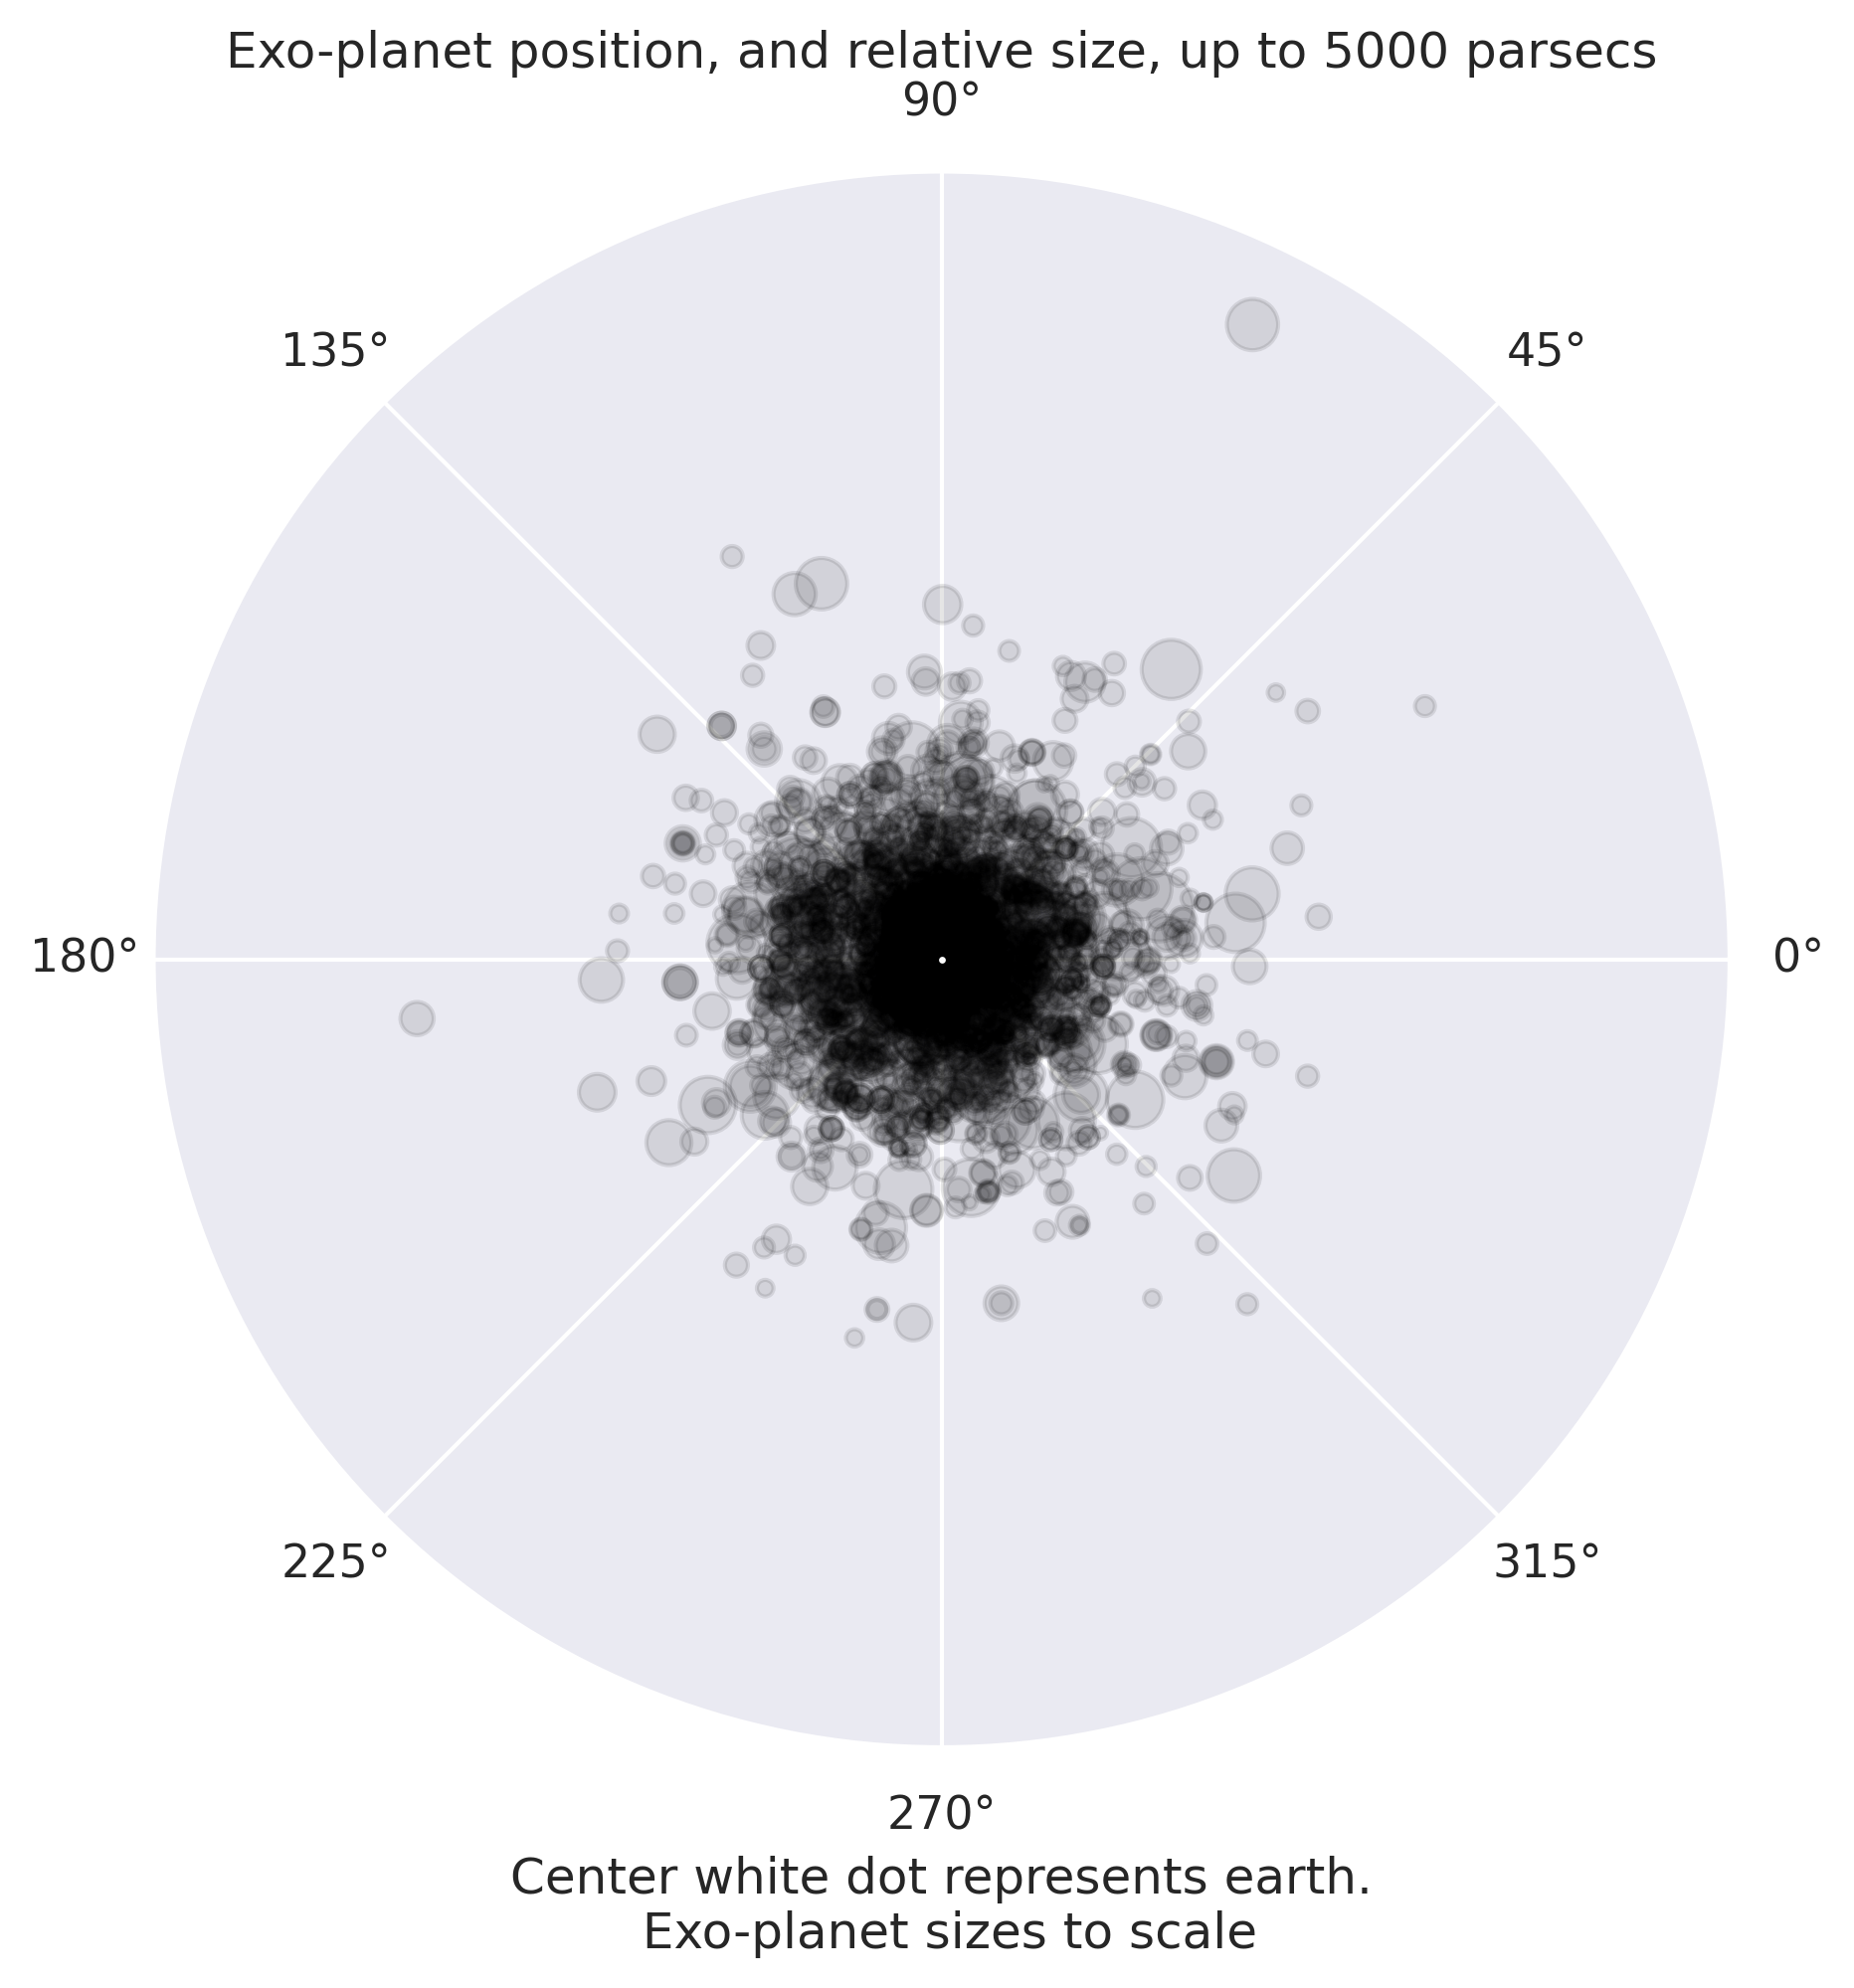

In [34]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='polar')
ax.scatter(x=df["longitude_gal"], y=df["distance"], sizes=30.488*0.4*(df["planet_radius"]), c="black", alpha=0.1)
ax.set(ylim=(0, 5000))
ax.axes.yaxis.set_visible(False)
ax.scatter(x=0, y=0, s=0.4, color='white')
plt.title('Exo-planet position, and relative size, up to 5000 parsecs')
plt.xlabel('Center white dot represents earth.\n Exo-planet sizes to scale')

Text(0.5, 0, 'Center white dot represents earth.\n Exo-planet sizes to scale')

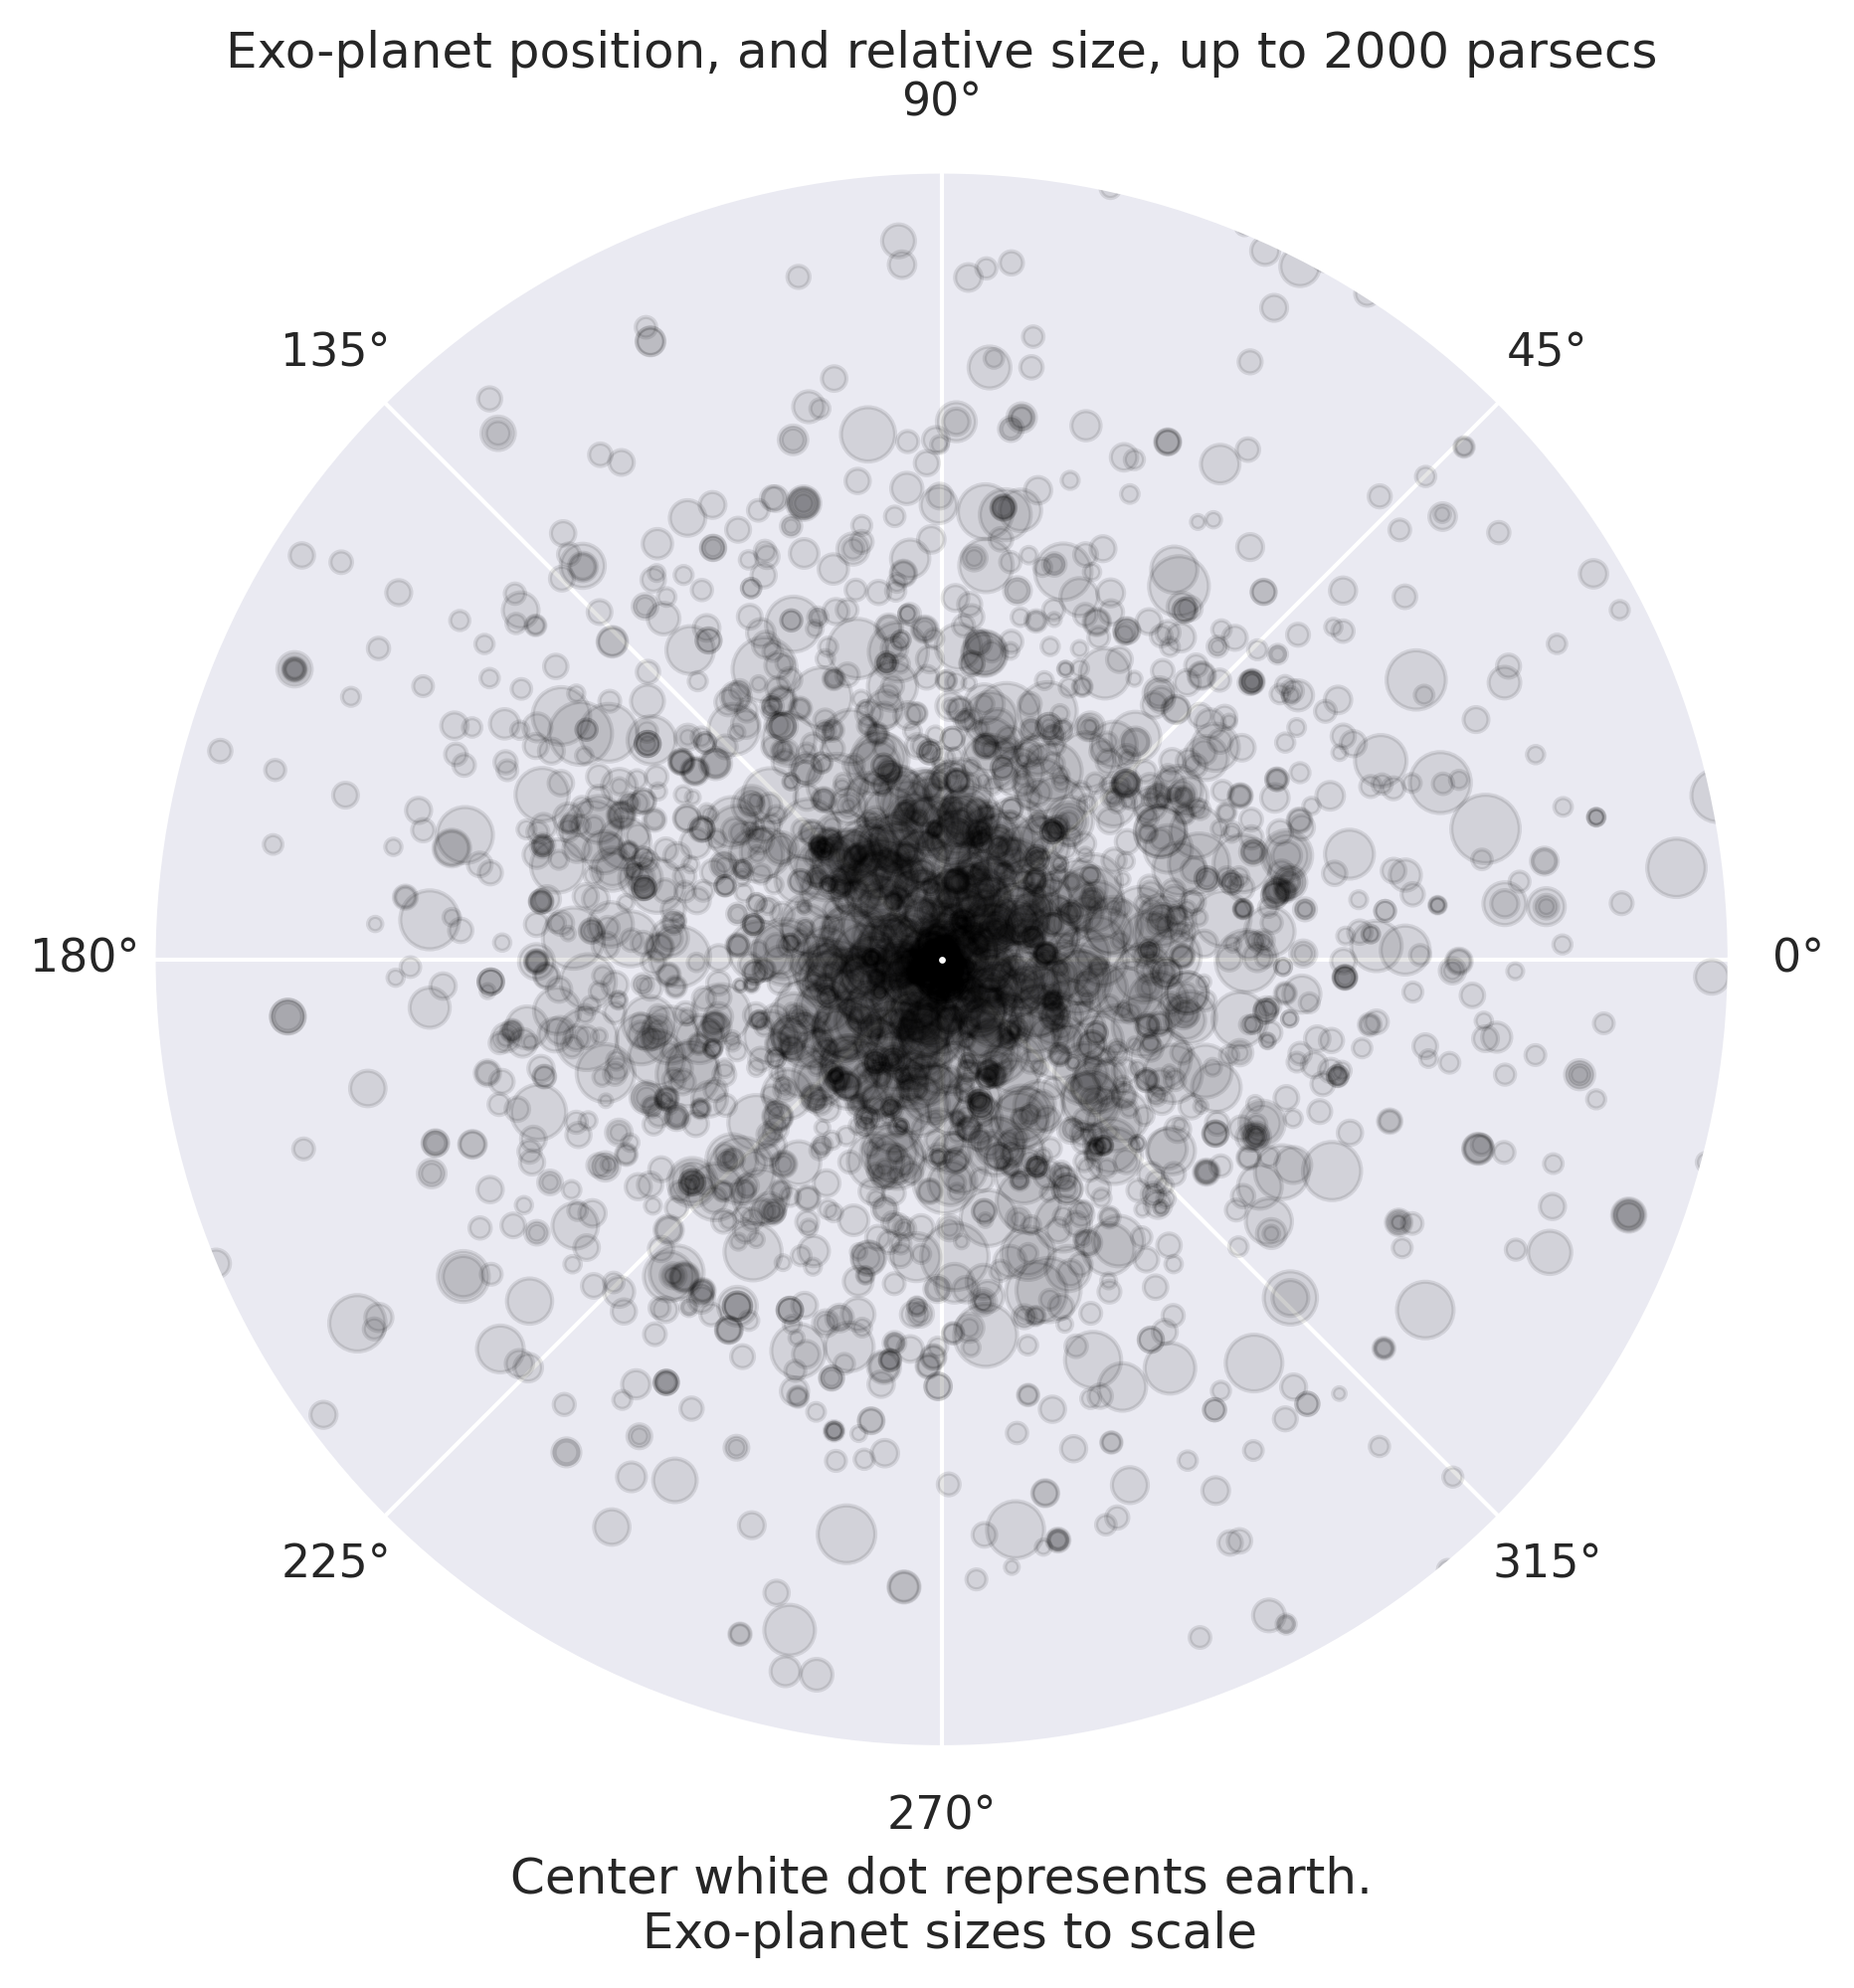

In [35]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='polar')
ax.scatter(x=df["longitude_gal"], y=df["distance"], sizes=30.488*0.4*(df["planet_radius"]), c="black", alpha=0.1)
ax.set(ylim=(0, 2000))
ax.axes.yaxis.set_visible(False)
ax.scatter(x=0, y=0, s=0.4, color='white')
plt.title('Exo-planet position, and relative size, up to 2000 parsecs')
plt.xlabel('Center white dot represents earth.\n Exo-planet sizes to scale')

This graph is a map-like representation of the position of all exoplanets in relation to Earth. The position is based on the galactic longitude, where 0 degrees is facing the galactic center, the distance from the center is proportional to the distance from our solar system. Earth is the small white dot in the center of the graph. Earth, and all discovered exoplanets are proportional to each other, meaning that this graph is an accurate visualization of how scale affects exoplanet discovery over distance.

The second plot is identical to the first but restricted to 2000 parsecs, to get a clearer view closer to Earth.
It is obvious that exoplanet discovery decreases with distance away from our solar-system, otherwise we would see a uniform distribution across this whole graph.

## ***`Literature Review`*** <a name="Literature_Review"></a>


From the Mesopotamians to the ancient Greeks, the study of stars originated centuries ago. In the modern age, we now look at stars to study their properties, the system they orbit in, and to get a grasp of the universe we live in. However, after the moon landing, astronomers have become more excited about entertaining the possibility of life beyond our solar system. This has prompted many research institutions to go on the hunt for orbiting exoplanets outside of our solar system.

Commonly, the method of exoplanet discovery involves the transit method. This involves looking in at a star and waiting for a dip in its brightness. If this dip in brightness occurs repeatedly over a certain period of time, then an orbiting exoplanet exists and is causing a dimming of the star as it passes in front of it (21). Other methods involves “monitoring the spectrum of a star for the tell-tale signs of a planet pulling on its star and causing its light to subtly Doppler shift.”(https://exoplanets.nasa.gov/what-is-an-exoplanet/overview/) This is commonly referred to as the wobble method.

Research into exo-planets and their properties have been quite vast, however, these studies have only been conducted by a select few agencies who possess the instruments to carry out such experiments. Although research into exoplanets was common, studies into the likelihood of exoplanet discovery based under different astronomical conditions have been quite rare, with hardly any studies relating to our research goal. We will therefore reference similar research that has already been done surrounding system formation, planet discovery and its astronomical properties.

Even though our dataset uses a combination of multiple methods into exo-planet discovery, “A coronagraphic or starshade-based direct imaging mission is the only path currently identified to characterize Earth-size planets in the habitable zones of a large sample of nearby Sun-like stars in reflected light”, was the only method used in a 2018 study (20)(18). Furthermore, this may lead to a bias in the type of planets discovered, in particular its size and mass may lean towards more earth-sized planets (10) (12).

In 2014, observations from the OSIRIS instruments provided astronomers with valuable data on exoplanets. The telescope's sensors produce transit waves that allow the discoverability of exoplanet atmospherics using a function of wavelengths(19). Changes within the function are small due to high altitude clouds that are present on these exoplanets. In order to create meaning out of the data, spectroscopic time series plots are required. Initially acquiring this data from telescopes was the best way to acquire quality data (19)(11)(12). However due to advancements in technology, similar precision data can be obtained from ground telescopes. 

Chemical evidence of sun-like stars such as inhomogeneous star system binaries may also be used to identify how planets are formed through protostellar gas clouds (9). While some theories research into how solar systems, and resultantly, exoplanets are formed through the daughter nuclei of short - lived radionuclides in calcium (10)(13). Identifying habitable planets in other systems is often very difficult using ground based telescopes, as noted in this alpha Centauri (12) and system formation study (15). This may be due to factors relating to pollution and light-noise, that may mask away the slight dimming and wobble effect of stars. Consequently, our visualisations and dataset takes advantage of satellite based telescopes (for example, Kepler had a high success rate in finding planets (around 3000 total) (22) while TESS accounted for 2200 discoveries (23)). On another note, observing exo-planets with 2 stars is interesting, as their uniquely shaped orbiting patterns may influence its radius (16)(23).

Although astronomers have found thousands of planets, most orbit around stars that will eventually become red giants and then into white dwarfs (14)(17). Because of this, identifying and monitoring these planets becomes increasingly difficult as light intensity from these stars decreases. Therefore our observation into predicting the size of exo-planets discovered under different astronomical conditions will prove useful in positioning telescopes towards systems that will most likely possess exo-planets. In addition, our study intends to predict other planetary attributes as a relation to its size.


---

## ***`Summary & Conclusions`*** <a name="Summary_and_Conclusions"></a>

The possibilities that exoplanets may bring for future generations are endless. Up until 1992, they were presumed to exist, but none had been confirmed. Recent missions, in particular Kepler, have brought to light how common they really are. Our reliance on physical instruments has limitations, and with phase 2 of this study, we will investigate the gaps in the data that we have presented previously.

Phase 1 required us to process our data and approach the standard required for multiple linear regression modeling. While there is more to go (such as normalizing the data), the steps we took have allowed us to explore many significant relationships with our data. We removed unnecessary columns, calculated new columns using data inferred from previous features, found outliers and dropped rows with missing values. We are left with almost 3000 rows, with no missing or unusual data.

We made two assumptions at the beginning of the study: That the distribution of exoplanets is independent of their distance from Earth, and that the radius of a planet is correlated with ease of discoverability. Our exploration suggests that the latter is true. We can also assume the former is true (until proven otherwise) as it is the simplest, and most agreed upon description of our universe accepted by astrophysicists. 

Exploration into the relationships between features revealed a strong link between orbital distance and orbital period, distance from earth and parallax, and planet mass and radius. We also discovered how the number of exoplanets per star system dropped to 1 after 2500 parsecs. This further supports our assumptions. Finally, exploring the positional relationship between exoplanets revealed to us the Kepler mission, and how it dominated our dataset. Without researching the mission itself, and matching patterns between our data and resources available online, we would have made false assumptions about that anomaly. Furthermore, removing outliers without understanding this impact on our dataset would have stripped our dataset of breadth.

Phase 2 of our project will attempt to solidify and quantify these discovered relationships.




---

## ***`References`*** <a name="References"></a>

1. NASA Exoplanet Archive. (n.d.). 
>Retrieved September 27, 2021, from https://exoplanetarchive.ipac.caltech.edu/ "This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program."
2. Greicius, T. (2018, April 12). 
>What in the World is an 'Exoplanet?' Retrieved from https://www.nasa.gov/feature/jpl/what-in-the-world-is-an-exoplanet
3. Zhang, Y., Luo, A., & Zhao, Y. 
>(2004). Outlier detection in astronomical data. Optimizing Scientific Return for Astronomy through Information Technologies. doi:10.1117/12.550998
4. Aksakalli, V. , Yenice, Z., Kai Wong, Y., Ture, I., Malekipirbazari, M.
>Feature Selection and Ranking in Machine Learning
http://www.featureranking.com/
5. Orbit Formula - an Overview 
>ScienceDirect Topics. Retrieved October 2, 2021 (https://www.sciencedirect.com/topics/engineering/orbit-formula).
6. Nobili, Anna M. and Clifford M. Will. 
>1986. “The Real Value of Mercury's Perihelion Advance.” Nature 320(6057):39–41. 
7. Maliuk, A. and J. Budaj. (2020). 
>“Spatial Distribution of Exoplanet Candidates Based on Kepler and Gaia Data.” Astronomy & Astrophysics 635. 
8. Johnson, Michele. (2015). 
>“Keplar Mission Overview.” NASA. Retrieved October 2, 2021 (https://www.nasa.gov/mission_pages/kepler/overview/index.html). 

    24. Anon. 2015. 
    > “Four-Fathers: New Exoplanet Discovery Part of a Quadruple-Star System.” NASA. Retrieved October 3, 2021 (https://exoplanets.nasa.gov/news/185/four-fathers-new-exoplanet-discovery-part-of-a-quadruple-star-system/).

    25. Tokivinin, A., Everett, M. E., Horch, E. P., Torres, G., Latham, D. W.
    (2019) 
    > “Speckle Observations and Orbits of ... - Iopscience.iop.org.” Retrieved October 3, 2021 (https://iopscience.iop.org/article/10.3847/1538-3881/ab4137/pdf).

    26. Turnbull, Margaret C. 2014.
    > “Finding Planets and Life among the Stars.” EMBO Reports 15(10):1002–9.

## Journals

Journals:

9. Spina, L. (2021, August 30). 
>Chemical evidence for planetary ingestion in a. . . Nature Astronomy. https://www.nature.com/articles/s41550-021-01451-8?error=cookies_not_supported&code=1244f8e8-32e9-493d-a1e6-21a6d1727509
10. Forbes, J. C. (2021, August 16). 
>A Solar System formation analogue in the. . . Nature Astronomy. https://www.nature.com/articles/s41550-021-01442-9?error=cookies_not_supported&code=b7c6226d-c54e-4b18-a32f-bc1d46eeff7f
11. Zhang, Y. (2021, August 13). 
>Isotopes in an atmosphere. Nature. https://www.nature.com/articles/s41586-021-03616-x?error=cookies_not_supported&code=b3156b54-5f8c-4640-908f-438edfef6e73
12. Wagner, K. (2021, March 4). 
>NEARing a direct detection of terrestrial worlds? Nature Communications. https://www.nature.com/articles/s41467-021-21176-6?error=cookies_not_supported&code=0dcdac04-c502-4ea0-8eec-fd45f1febe3a
13. Dumusque, X. (2012, October 17). 
>Meet our closest neighbour. Nature. https://www.nature.com/articles/nature11572?error=cookies_not_supported&code=a4dc7868-32f0-41dc-afd8-f0995f06c703
14. Vanderburg, A. (2020, September 16). 
>Planet discovered transiting a dead star. Nature. https://www.nature.com/articles/s41586-020-2713-y?error=cookies_not_supported&code=21ed3491-04c8-46c1-8418-2749cc464ae5
15. Forbes, J. C. (2021b, August 16). 
>A Solar System formation analogue in the. . . Nature Astronomy. https://www.nature.com/articles/s41550-021-01442-9?error=cookies_not_supported&code=8d13a6b3-ad1d-4547-908f-3e64c96a13e6
16. Popp, M. (2017, April 6). 
>Climate variations on Earth-like circumbinary. . . Nature Communications. https://www.nature.com/articles/ncomms14957?error=cookies_not_supported&code=7665ce2c-bf8b-4817-b202-706830e5a5b6
17. David, T. J. (2016, June 20). 
>A Neptune-sized transiting planet closely. . . Nature. https://www.nature.com/articles/nature18293?error=cookies_not_supported&code=e0a9d03e-6b0b-4066-af2e-e74a99a9de86
18. Barclay, T. (2013, February 20). 
>A sub-Mercury-sized exoplanet. Nature. https://www.nature.com/articles/nature11914?error=cookies_not_supported&code=bec19f46-fd56-4ed9-8a87-48292bff33d5
19. Barclay, T. (2013b, February 20). 
>A sub-Mercury-sized exoplanet. Nature. https://www.nature.com/articles/nature11914?error=cookies_not_supported&code=050ba3ba-ec21-470c-b873-ab84dc5bf482
20. Arbesman, S. (2010, October 4). 
>A Scientometric Prediction of the Discovery of the First Potentially Habitable Planet with a Mass Similar to Earth. Nature. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0013061
Conference Papers:


### Conferance Papers

21. Astronomy & Astrophysics (A&A). (n.d.). 
>RMIT Library. Retrieved October 3, 2021, from https://www.aanda.org/articles/aa/pdf/2016/01/aa26313-15.pdf
22. Magrin, DM. (2019). 
>PLATO: the ESA mission for exoplanets discovery: (Vol 10698). PROCEEDINGS OF SPIED.  https://www.cosmos.esa.int/documents/343127/343227/106984X.pdf/3581ec9b-d8fb-48c5-7f75-8da5b3d31015
23. Huag, CXH. (2018). 
>TESS DISCOVERY OF A TRANSITING SUPER-EARTH IN THE π MENSAE SYSTEM. https://arxiv.org/pdf/1809.05967.pdf